In [48]:
%matplotlib inline
import signac
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from pathlib import Path
from itertools import product
import pandas as pd
import json

sns.set(context="notebook", style="whitegrid",font_scale=1.2,palette='viridis')

sys.path.insert(0,'./scripts/')
from utils.colormap import get_energyCmap

cmap = get_energyCmap()

In [49]:
base = './'
fn_projects = {
    'm0':base+'model_0',
}

In [50]:
base = './results/scripts_all_2/'
base = './results/'
fn_projects = {
    'm':'./results/scripts_all_2/model',
    # 'm2':'./results/model_3',
    'm2':'./results/model_5',
    # 'm2':'./results/scripts_all_5/model/',
}

In [51]:
names = [
    'qm9',
    'molecular_crystals',
    'silicon_bulk',
    'methane_liquid',
    'methane_sulfonic'
]
radial_basis = ['GTO','DVR','GTO Spline','DVR Spline']
grads = [True, False]

fpfx = 'figures/v5/model/'

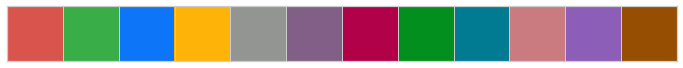

In [52]:
colors = ["pale red","medium green",
          "deep sky blue", "amber", "grey",  "dusty purple",
          "raspberry","emerald green","ocean","dirty pink",
         "deep lavender","warm brown"]
palette = sns.xkcd_palette(colors)
sns.palplot(palette)

In [53]:
project = signac.get_project(fn_projects['m'])
ii =0 
for job in project.find_jobs():
    if 'benchmark' in job.document:
    # print(job.document)
        for p in job.document.benchmark:
            if p['mean'] < 4*p['stdev']:
                # print(job.sp.name,job.sp.representation.compute_gradients, job.sp.representation.optimization_args , job.sp.representation.radial_basis, job.document.elapsed_mean ,job.document.elapsed_std)

                # data = fromjson(job.fn('in_ri_cpp.json'))
                print(p)
                ii += 1

{'tag': 'NL', 'mean': 0.13942439230158926, 'stdev': 0.07527436932510582, 'min': 0.09956264076754451, 'max': 0.289946551900357, 'samples': [0.289946551900357, 0.10403520287945867, 0.10176987666636705, 0.10180768929421902, 0.09956264076754451], 'name': 'qm9', 'n_atoms': 14418}
{'tag': 'rep with grad', 'mean': 20.09589856332168, 'stdev': 10.906593353394818, 'min': 9.03977928776294, 'max': 34.7671589339152, 'samples': [10.010685247834772, 9.03977928776294, 34.7671589339152, 31.53589639486745, 15.12597295222804], 'name': 'qm9', 'n_atoms': 14418}
{'tag': 'pred energy', 'mean': 0.3147685560397804, 'stdev': 0.1524762619766814, 'min': 0.1633570217527449, 'max': 0.5013605090789497, 'samples': [0.1644122707657516, 0.1633570217527449, 0.5013605090789497, 0.49331782618537545, 0.25139515241608024], 'name': 'qm9', 'n_atoms': 14418}
{'tag': 'pred forces', 'mean': 4.3985015179030595, 'stdev': 8.796654509988258, 'min': 0.00016441196203231812, 'max': 21.9918105378747, 'samples': [0.00017591891810297966, 

{'tag': 'rep with grad', 'mean': 55.24646337172017, 'stdev': 23.43259593276993, 'min': 22.999380018096417, 'max': 81.52504136878997, 'samples': [37.138967770151794, 22.999380018096417, 53.19037987291813, 81.52504136878997, 81.37854782864451], 'name': 'qm9', 'n_atoms': 14418}
{'tag': 'rep with grad', 'mean': 37.30475306548178, 'stdev': 11.14139689809412, 'min': 22.710260949097574, 'max': 47.34940779861063, 'samples': [24.717572094872594, 22.710260949097574, 46.734514686279, 47.34940779861063, 45.012009798549116], 'name': 'qm9', 'n_atoms': 14418}
{'tag': 'pred energy', 'mean': 0.9488400057889521, 'stdev': 0.29991081442649337, 'min': 0.5806202138774097, 'max': 1.2166523579508066, 'samples': [0.5806202138774097, 0.5843050917610526, 1.2082538274116814, 1.1543685379438102, 1.2166523579508066], 'name': 'qm9', 'n_atoms': 14418}
{'tag': 'pred forces', 'mean': 55.78559453133494, 'stdev': 68.32294775372378, 'min': 0.00016622710973024368, 'max': 139.64422026416287, 'samples': [139.28309474419802, 

In [29]:
ii

54

# m0

{'Nselect': {'14': 5000}, 'act_on': 'sample per species', 'seed': 10}
{'Nselect': {'14': 100}, 'act_on': 'sample per species', 'seed': 10}
{'Nselect': {'14': 9000}, 'act_on': 'sample per species', 'seed': 10}
{'Nselect': {'14': 200}, 'act_on': 'sample per species', 'seed': 10}
{'Nselect': {'14': 2000}, 'act_on': 'sample per species', 'seed': 10}
{'Nselect': {'14': 500}, 'act_on': 'sample per species', 'seed': 10}
{'Nselect': {'14': 1000}, 'act_on': 'sample per species', 'seed': 10}


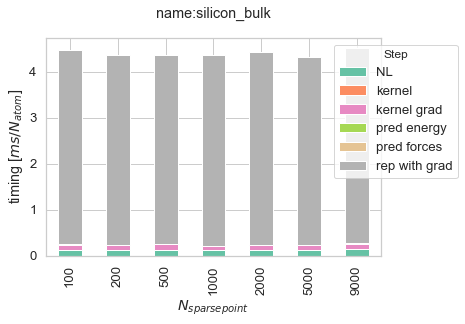

In [39]:
project = signac.get_project(fn_projects['m0'])
qry = {'feature_subselection.Nselect':{'$eq':None}, 'representation.normalize':{'$eq':False}}
aa = []
n_atoms = 2700
for job in project.find_jobs(qry):
    # print(job.sp.sparse_point_subselection)
    ee = job.document.benchmark
    for v in ee:
        v['$N_{sparse point}$'] = job.sp.sparse_point_subselection.Nselect['14']
        v['mean [ms/atom]'] = v['mean'] / n_atoms * 1000
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']

df2 = df.pivot_table(index='$N_{sparse point}$', columns='tag', values='mean [ms/atom]')

df2.plot(kind='bar', stacked=True, colormap="Set2")
title = ' / '.join([k+':'+str(df.iloc[0][k]) for k in title_values])
plt.title(title,pad=20)
plt.ylabel('timing [$ms/N_{atom}$]')
plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

{'Nselect': 650, 'act_on': 'feature', 'seed': 10}
{'Nselect': 130, 'act_on': 'feature', 'seed': 10}
{'Nselect': 13, 'act_on': 'feature', 'seed': 10}
{'Nselect': None, 'act_on': 'feature', 'seed': 10}
{'Nselect': 260, 'act_on': 'feature', 'seed': 10}
{'Nselect': 909, 'act_on': 'feature', 'seed': 10}
{'Nselect': 65, 'act_on': 'feature', 'seed': 10}
{'Nselect': 1300, 'act_on': 'feature', 'seed': 10}


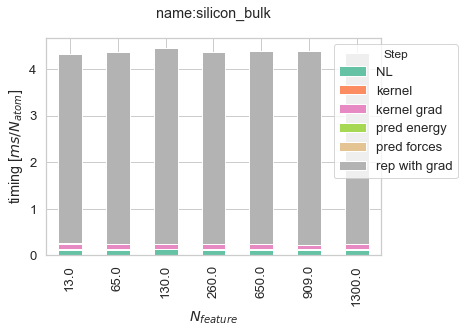

In [42]:
project = signac.get_project(fn_projects['m0'])
qry = {'sparse_point_subselection.Nselect':{'14':9000}, 'representation.normalize':{'$eq':False}}
aa = []
n_atoms = 2700
for job in project.find_jobs(qry):
    print(job.sp.feature_subselection)
    ee = job.document.benchmark
    for v in ee:
        v['$N_{feature}$'] = job.sp.feature_subselection.Nselect
        v['mean [ms/atom]'] = v['mean'] / n_atoms * 1000
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']

df2 = df.pivot_table(index='$N_{feature}$', columns='tag', values='mean [ms/atom]')

df2.plot(kind='bar', stacked=True, colormap="Set2")
title = ' / '.join([k+':'+str(df.iloc[0][k]) for k in title_values])
plt.title(title,pad=20)
plt.ylabel('timing [$ms/N_{atom}$]')
plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

In [55]:
df

Empty DataFrame
Columns: []
Index: []

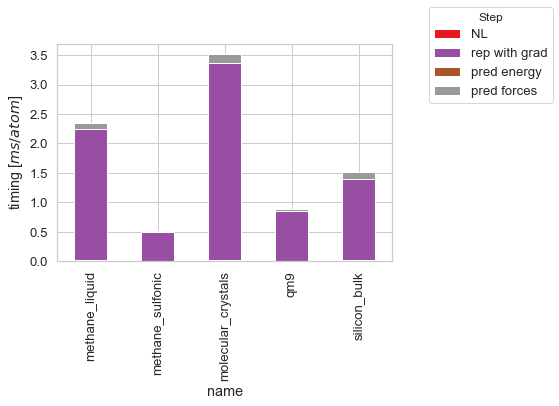

In [29]:
project = signac.get_project(fn_projects['m'])
qry = {}
aa = []
for job in project.find_jobs(qry):
    # print(job.sp.sparse_point_subselection)
    ee = job.document.benchmark
    for v in ee:
        # v['$N_{sparse point}$'] = job.sp.sparse_point_subselection.Nselect['14']
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
        # divide by 2 because yerr input is for the upper/lower error bar respectively
        v['std [ms/atom]'] = v['stdev'] / v['n_atoms'] * 1000 / 2
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']

df2 = df.pivot_table(index='name', columns='tag', values='mean [ms/atom]')
df2 = df2[['NL','rep with grad', 'pred energy', 'pred forces']]
df2.plot(kind='bar', stacked=True, colormap='Set1')
# df2.plot(kind='bar', stacked=True, colormap='Set2')
# title = ' / '.join([k+':'+str(df.iloc[0][k]) for k in title_values])
# plt.title(title,pad=20)
plt.ylabel('timing [$ms/atom$]')
plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.5, 1.2))
plt.show()

In [31]:
df

tag       mean     stdev        min        max  \
0              NL   0.030295  0.007503   0.026039   0.045268   
1   rep with grad   3.586335  0.004367   3.581278   3.592200   
2     pred energy   0.014127  0.003205   0.007867   0.016824   
3     pred forces   0.166740  0.001369   0.164954   0.168651   
4              NL   0.025909  0.009910   0.016754   0.043692   
5   rep with grad   4.713388  0.055042   4.652424   4.790574   
6     pred energy   0.004488  0.001154   0.002200   0.005353   
7     pred forces   0.204184  0.007742   0.189233   0.211397   
8              NL   0.031890  0.011908   0.018770   0.046983   
9   rep with grad   1.994908  0.010778   1.984874   2.012771   
10    pred energy   0.008220  0.003911   0.003343   0.011755   
11    pred forces   0.185489  0.015232   0.164711   0.199956   
12             NL   0.084179  0.012183   0.077103   0.108467   
13  rep with grad  12.265715  1.001687  11.417741  13.561481   
14    pred energy   0.016109  0.000199   0.015784   0.016409   
15    pred forces   0.458060  0.015608   0.438886   0.475828   
16             NL   0.058745  0.009650   0.047998   0.076856   
17  rep with grad   8.100166  0.080823   8.040804   8.256289   
18    pred energy   0.012178  0.003701   0.004795   0.014467   
19    pred forces   0.407666  0.014536   0.380598   0.419724   

                                              samples                name  \
0   [0.04526832397095859, 0.027476116083562374, 0....    methane_sulfonic   
1   [3.592199904844165, 3.590311781037599, 3.58595...    methane_sulfonic   
2   [0.01593140698969364, 0.014805778861045837, 0....    methane_sulfonic   
3   [0.16495355498045683, 0.1664204818662256, 0.16...    methane_sulfonic   
4   [0.02829388715326786, 0.023910989984869957, 0....  molecular_crystals   
5   [4.652424187166616, 4.7670378889888525, 4.6872...  molecular_crystals   
6   [0.004978286102414131, 0.002200069837272167, 0...  molecular_crystals   
7   [0.2051214079838246, 0.20727997599169612, 0.21...  molecular_crystals   
8   [0.02981878793798387, 0.04428557911887765, 0.0...        silicon_bulk   
9   [2.0014293321873993, 2.012770886067301, 1.9848...        silicon_bulk   
10  [0.003532694885507226, 0.011415062006562948, 0...        silicon_bulk   
11  [0.19465699000284076, 0.169381600106135, 0.198...        silicon_bulk   
12  [0.0797273840289563, 0.07847605901770294, 0.10...                 qm9   
13  [13.420780966058373, 13.561481471173465, 11.46...                 qm9   
14  [0.016074665123596787, 0.01640906697139144, 0....                 qm9   
15  [0.4397061460185796, 0.4690961211454123, 0.438...                 qm9   
16  [0.04799841297790408, 0.054664759896695614, 0....      methane_liquid   
17  [8.098170606885105, 8.064386034850031, 8.04118...      methane_liquid   
18  [0.01367178582586348, 0.014049289980903268, 0....      methane_liquid   
19  [0.4194098610896617, 0.4134932339657098, 0.380...      methane_liquid   

    n_atoms  mean [ms/atom]  std [ms/atom]  
0      7371        0.004110       0.000509  
1      7371        0.486547       0.000296  
2      7371        0.001917       0.000217  
3      7371        0.022621       0.000093  
4      1408        0.018401       0.003519  
5      1408        3.347577       0.019546  
6      1408        0.003187       0.000410  
7      1408        0.145017       0.002749  
8      1458        0.021873       0.004084  
9      1458        1.368250       0.003696  
10     1458        0.005638       0.001341  
11     1458        0.127222       0.005224  
12    14418        0.005838       0.000422  
13    14418        0.850722       0.034737  
14    14418        0.001117       0.000007  
15    14418        0.031770       0.000541  
16     3645        0.016117       0.001324  
17     3645        2.222268       0.011087  
18     3645        0.003341       0.000508  
19     3645        0.111842       0.001994

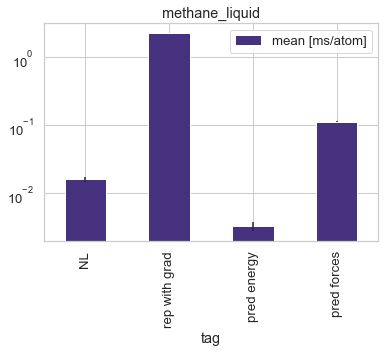

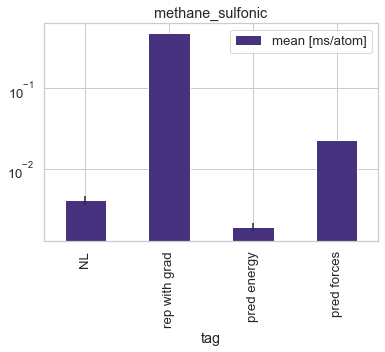

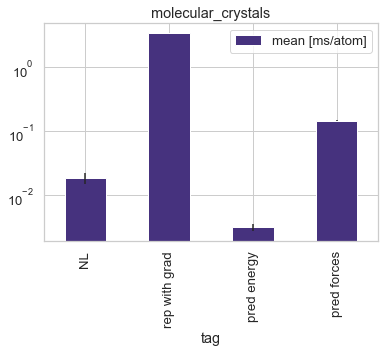

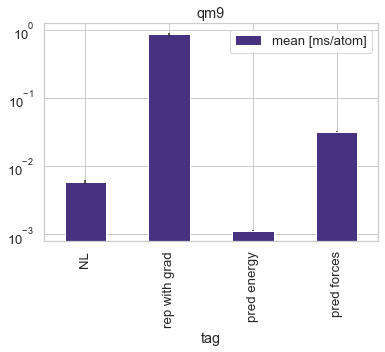

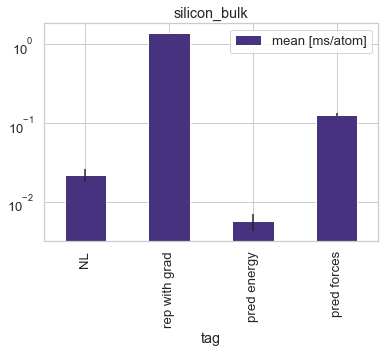

In [32]:
for name,d in df.groupby('name'):
    d.plot(kind='bar', x='tag', y='mean [ms/atom]', yerr='std [ms/atom]',title=name, logy=True)

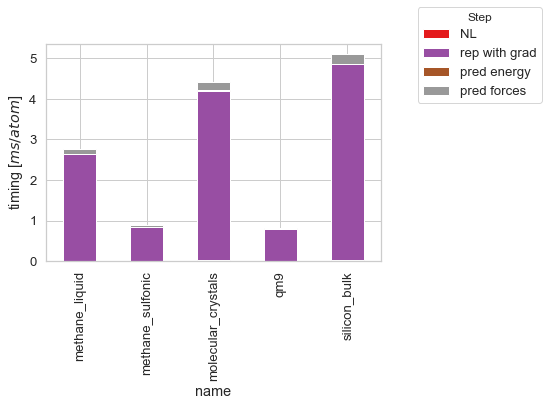

In [28]:
project = signac.get_project(fn_projects['m'])
qry = {}
aa = []
for job in project.find_jobs(qry):
    # print(job.sp.sparse_point_subselection)
    ee = job.document.benchmark
    for v in ee:
        # v['$N_{sparse point}$'] = job.sp.sparse_point_subselection.Nselect['14']
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
        # divide by 2 because yerr input is for the upper/lower error bar respectively
        v['std [ms/atom]'] = v['stdev'] / v['n_atoms'] * 1000 / 2
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']

df2 = df.pivot_table(index='name', columns='tag', values='mean [ms/atom]')
df2 = df2[['NL','rep with grad', 'pred energy', 'pred forces']]
df2.plot(kind='bar', stacked=True, colormap='Set1')
# df2.plot(kind='bar', stacked=True, colormap='Set2')
# title = ' / '.join([k+':'+str(df.iloc[0][k]) for k in title_values])
# plt.title(title,pad=20)
plt.ylabel('timing [$ms/atom$]')
plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.5, 1.2))
plt.show()

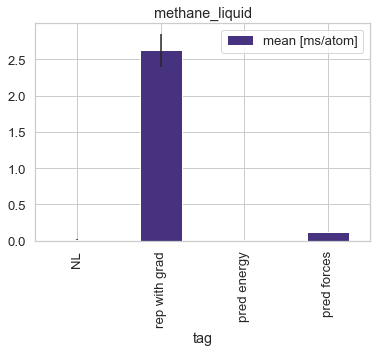

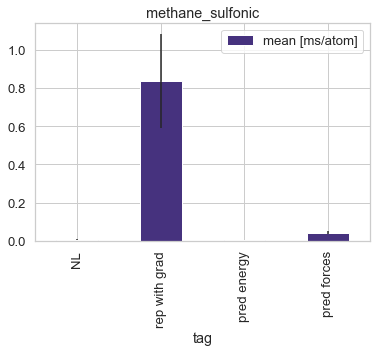

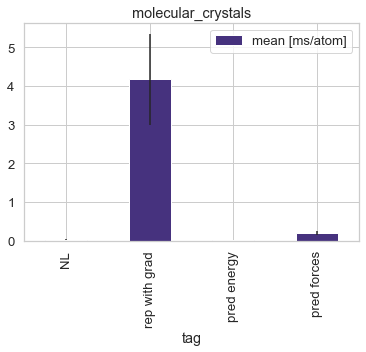

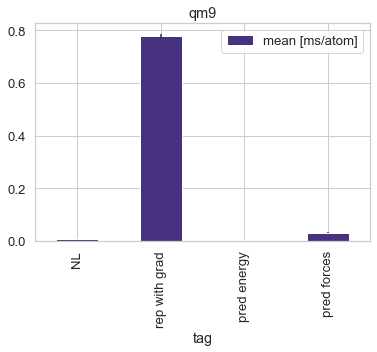

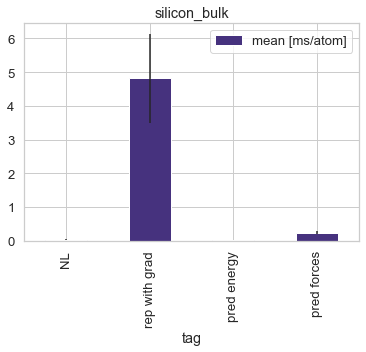

In [27]:
for name,d in df.groupby('name'):
    d.plot(kind='bar', x='tag', y='mean [ms/atom]', yerr='std [ms/atom]',title=name, logy=False)

# all_2

In [11]:
aa = []
qry = {'feature_subselection.Nselect':{'$ne':None}}
for job in project.find_jobs(qry):
    aa.append({'name':job.sp.name, 'N':job.sp.feature_subselection.Nselect})
df = pd.DataFrame(aa)
names = df.name.unique()
aa = {}
for name in names:
    aa[name] = np.sort(df[df['name']==name].N.unique())[-2]
aa

{'molecular_crystals': 2600,
 'qm9': 9750,
 'methane_liquid': 1950,
 'silicon_bulk': 650,
 'methane_sulfonic': 6500}

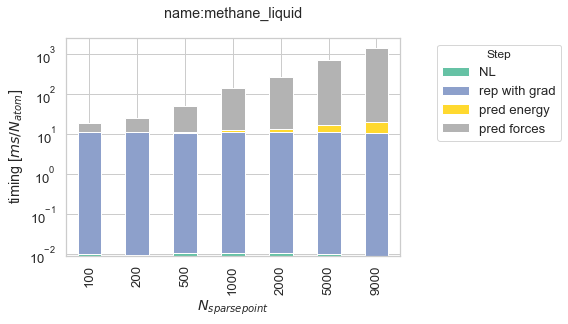

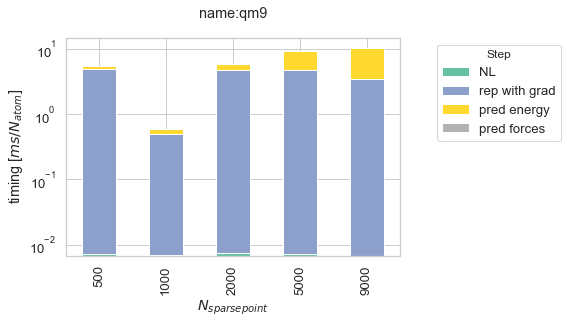

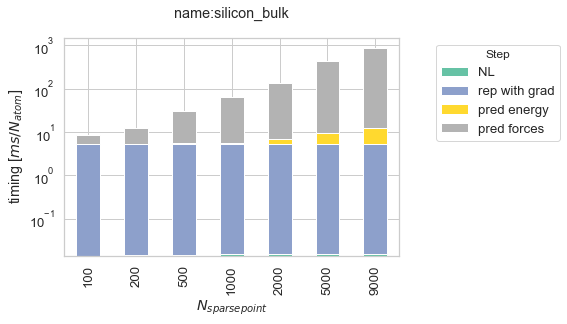

In [14]:

project = signac.get_project(fn_projects['m'])
qry = {'feature_subselection.Nselect':{'$eq':None}, 'representation.normalize':{'$eq':True}}
aa = []
order = ['NL', 'rep with grad', 'pred energy', 'pred forces']
for job in project.find_jobs(qry):
    # print(job.sp.sparse_point_subselection)
    ee = job.document.benchmark
    for v in ee:
        v['$N_{sparse point}$'] = np.sum(list(job.sp.sparse_point_subselection.Nselect.values()))
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']
for name, df_ in df.groupby(['name']):
    df2 = df_.pivot_table(index='$N_{sparse point}$', columns='tag', values='mean [ms/atom]')

    df2.reindex(columns=order).plot(kind='bar', stacked=True, colormap="Set2")
    title = ' / '.join(['name:{}'.format(name)])
    plt.title(title,pad=20)
    plt.ylabel('timing [$ms/N_{atom}$]')
    plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.5, 1))
    # plt.yscale('log')
    # fname = 'model-bar_stack-{}.png'.format(name)
    # plt.savefig(fpfx+fname, dpi=300, bbox_inches='tight')
    plt.show()

In [15]:
aa = []
qry = {'feature_subselection.Nselect':{'$ne':None}}
for job in project.find_jobs(qry):
    aa.append({'name':job.sp.name, 'N':job.sp.feature_subselection.Nselect})
df = pd.DataFrame(aa)
names = df.name.unique()
aa = {}
for name in names:
    aa[name] = np.sort(df[df['name']==name].N.unique())[-1]
aa

{'molecular_crystals': 6500,
 'qm9': 13650,
 'methane_liquid': 2730,
 'silicon_bulk': 909,
 'methane_sulfonic': 9100}

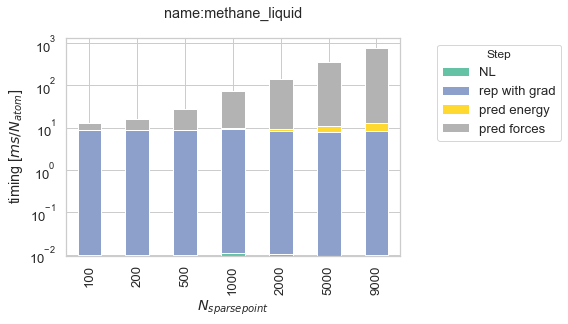

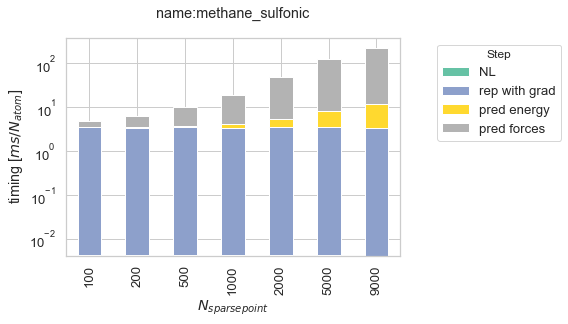

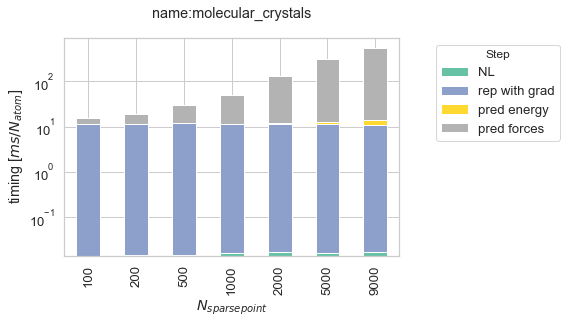

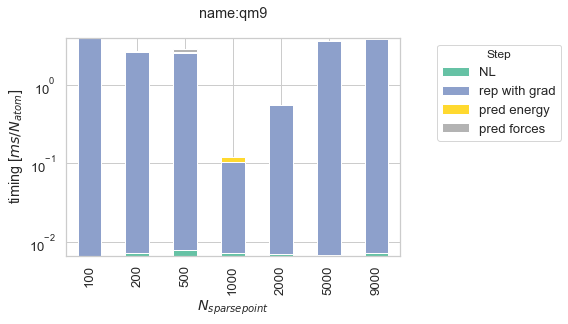

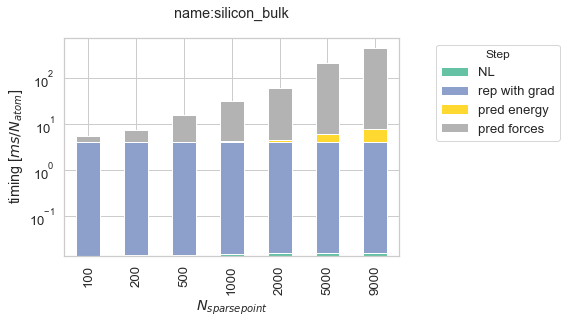

In [16]:

project = signac.get_project(fn_projects['m'])
qry = {'representation.normalize':{'$eq':True}}
aa = []
order = ['NL', 'rep with grad', 'pred energy', 'pred forces']
# with 50% features
select = {'methane_liquid': 1950, 'molecular_crystals': 2600, 'methane_sulfonic': 6500, 'qm9': 9750, 'silicon_bulk': 650}
for job in project.find_jobs(qry):
    if select[job.sp.name] != job.sp.feature_subselection.Nselect:
        continue
    ee = job.document.benchmark
    for v in ee:
        v['$N_{sparse point}$'] = np.sum(list(job.sp.sparse_point_subselection.Nselect.values()))
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']
for name, df_ in df.groupby(['name']):
    df2 = df_.pivot_table(index='$N_{sparse point}$', columns='tag', values='mean [ms/atom]')

    df2.reindex(columns=order).plot(kind='bar', stacked=True, colormap="Set2")
    title = ' / '.join(['name:{}'.format(name)])
    plt.title(title,pad=20)
    plt.ylabel('timing [$ms/N_{atom}$]')
    plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.5, 1))
    plt.yscale('log')
    fname = 'model-sparse_point-{}-nfeat_{}.png'.format(name,select[name])
    plt.savefig(fpfx+fname, dpi=300, bbox_inches='tight')
    plt.show()

In [16]:
aa= []
for job in project.find_jobs():
    # print(job.sp.name, np.sum(list(job.sp.sparse_point_subselection.Nselect.values())))
    aa.append(np.sum(list(job.sp.sparse_point_subselection.Nselect.values())))
np.unique(aa)

array([ 100,  200,  500, 1000, 2000, 5000, 9000])

In [46]:
print(job.sp)

{'representation': {'interaction_cutoff': 5.0, 'cutoff_smooth_width': 0.5, 'max_radial': 10, 'max_angular': 12, 'gaussian_sigma_type': 'Constant', 'soap_type': 'PowerSpectrum', 'normalize': True, 'expansion_by_species_method': 'structure wise', 'global_species': [1, 6, 8, 16], 'compute_gradients': False, 'cutoff_function_parameters': {}, 'cutoff_function_type': 'ShiftedCosine', 'gaussian_sigma_constant': 0.4, 'coefficient_subselection': None, 'radial_basis': 'GTO', 'optimization_args': {'type': 'Spline', 'accuracy': 1e-08, 'range': [0, 5]}}, 'kernel': {'name': 'GAP', 'zeta': 2, 'target_type': 'Structure', 'kernel_type': 'Sparse'}, 'name': 'methane_sulfonic', 'filename': '../../structures/methane_sulfonic_150.json', 'self_contributions': {'1': -0.6645519125911715, '6': -5.654232251386078, '8': -15.852522852103935, '16': -9.17258361289801}, 'train_with_grad': False, 'sparse_point_subselection': {'Nselect': {'1': 2250, '6': 2250, '8': 2250, '16': 2250}, 'act_on': 'sample per species', 'se

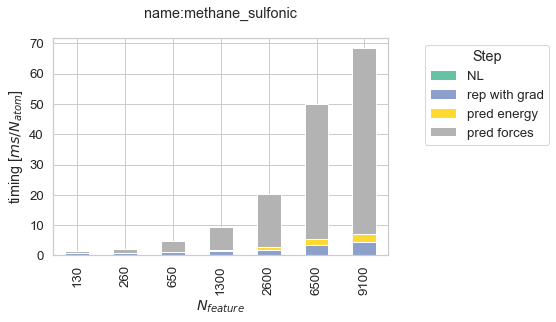

In [45]:
project = signac.get_project(fn_projects['m'])
qry = {'representation.normalize':{'$eq':True}, 'feature_subselection.Nselect':{'$ne':None},
      'name': {'$eq':'methane_sulfonic'}}
# qry = {'representation.normalize':{'$eq':True}, 'feature_subselection.Nselect':{'$ne':None}}
aa = []
n_sparse = 2000
order = ['NL', 'rep with grad', 'pred energy', 'pred forces']
# order = ['NL', 'rep', 'pred energy']

for job in project.find_jobs(qry):
    if np.sum(list(job.sp.sparse_point_subselection.Nselect.values())) != n_sparse:
        continue
        
    # print(job.sp.feature_subselection)
    ee = job.document.benchmark
    for v in ee:
        v['$N_{feature}$'] = int(job.sp.feature_subselection.Nselect)
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']
for name, df_ in df.groupby(['name']):
    df2 = df_.pivot_table(index='$N_{feature}$', columns='tag', values='mean [ms/atom]')

    df2.reindex(columns=order).plot(kind='bar', stacked=True, colormap="Set2")
    title = ' / '.join([k+':'+str(df_.iloc[0][k]) for k in title_values])
    plt.title(title,pad=20)
    plt.ylabel('timing [$ms/N_{atom}$]')
    plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.5, 1))
    # plt.yscale('log')
    fname = 'model-feature_sparsification-{}-nsparse_{}.png'.format(name,n_sparse)
    # plt.savefig(fpfx+fname, dpi=300, bbox_inches='tight')
    plt.show()

In [43]:
df

tag        mean     stdev         min         max  \
0              NL    0.030426  0.000911    0.029613    0.032056   
1   rep with grad    7.586887  0.028110    7.555373    7.631267   
2     pred energy    0.953150  0.045675    0.871569    0.989443   
3     pred forces   25.548388  0.105123   25.383244   25.712442   
4              NL    0.031618  0.001593    0.029445    0.033220   
5   rep with grad    9.670933  0.121713    9.463402    9.789312   
6     pred energy    2.317942  0.080445    2.166722    2.403452   
7     pred forces   56.088446  1.777634   53.351165   57.909706   
8              NL    0.030444  0.000263    0.030066    0.030875   
9   rep with grad   14.082976  0.179415   13.732001   14.227840   
10    pred energy    5.255077  0.145043    5.064698    5.378909   
11    pred forces  129.914118  2.485344  126.503921  132.128932   
12             NL    0.031132  0.001366    0.029962    0.033263   
13  rep with grad    6.329344  0.008531    6.319460    6.343084   
14    pred energy    0.301986  0.001206    0.299944    0.303590   
15    pred forces    8.648979  0.032748    8.583670    8.669691   
16             NL    0.031322  0.000753    0.030190    0.032300   
17  rep with grad    5.970195  0.025070    5.931796    6.000635   
18    pred energy    0.141006  0.000508    0.140377    0.141508   
19    pred forces    3.951847  0.003905    3.946591    3.958012   
20             NL    0.030005  0.000132    0.029795    0.030176   
21  rep with grad   31.532948  0.159909   31.293680   31.755201   
22    pred energy   19.581162  0.126522   19.471164   19.794237   
23    pred forces  452.761892  1.963513  449.091251  454.889127   
24             NL    0.031478  0.000732    0.030037    0.032035   
25  rep with grad   25.698802  0.127393   25.574517   25.942409   
26    pred energy   13.928940  0.106353   13.732485   14.038106   
27    pred forces  328.451405  1.666480  326.054457  330.408022   

                                              samples              name  \
0   [0.03205646714195609, 0.029725905042141676, 0....  methane_sulfonic   
1   [7.631266744341701, 7.606826181057841, 7.56535...  methane_sulfonic   
2   [0.8715691519901156, 0.9894433957524598, 0.986...  methane_sulfonic   
3   [25.38324448792264, 25.528764546383172, 25.712...  methane_sulfonic   
4   [0.029444866813719273, 0.033192811999469995, 0...  methane_sulfonic   
5   [9.463402206078172, 9.730257295072079, 9.76653...  methane_sulfonic   
6   [2.1667221994139254, 2.328816825989634, 2.3286...  methane_sulfonic   
7   [53.35116458311677, 54.632802655920386, 57.102...  methane_sulfonic   
8   [0.030065961182117462, 0.030436023604124784, 0...  methane_sulfonic   
9   [14.227840420790017, 14.163834082894027, 14.18...  methane_sulfonic   
10  [5.37158841593191, 5.369354576803744, 5.378908...  methane_sulfonic   
11  [131.5412034052424, 132.10754560912028, 132.12...  methane_sulfonic   
12  [0.029962248168885708, 0.032248042058199644, 0...  methane_sulfonic   
13  [6.3430840079672635, 6.322099395096302, 6.3194...  methane_sulfonic   
14  [0.30358951119706035, 0.3026822619140148, 0.30...  methane_sulfonic   
15  [8.662182823754847, 8.665241686161608, 8.66411...  methane_sulfonic   
16  [0.030761747620999813, 0.03179487073794007, 0....  methane_sulfonic   
17  [6.000635277014226, 5.991944739595056, 5.97260...  methane_sulfonic   
18  [0.1403765520080924, 0.1404067687690258, 0.141...  methane_sulfonic   
19  [3.952721742913127, 3.952986794989556, 3.94892...  methane_sulfonic   
20  [0.029795372858643532, 0.030107032041996717, 0...  methane_sulfonic   
21  [31.638180830981582, 31.432963320985436, 31.29...  methane_sulfonic   
22  [19.658458328340203, 19.478790550958365, 19.50...  methane_sulfonic   
23  [454.88912653177977, 449.0912507320754, 452.71...  methane_sulfonic   
24  [0.030037261079996824, 0.03162766434252262, 0....  methane_sulfonic   
25  [25.685284284874797, 25.57451714295894, 25.942...  methane_sulfonic   
26  [13.732485331129283, 14.038106420077384, 

In [19]:
def plot_bar(df, title, x, y, yerr , row, col, **kwargs):
    g = sns.FacetGrid(df, col=col, row=row, height=5, **kwargs)
    g.map_dataframe(draw_bar, x, y, yerr, title)
    return g
def draw_bar(*args, **kwargs):
    data = kwargs.pop('data')
    data.plot(kind='bar', x=args[0], y=args[1], yerr=args[2],title=args[3], logy=True, ax=plt.gca())

In [18]:
project = signac.get_project(fn_projects['m'])
qry = {'feature_subselection.Nselect':{'$ne':None}}
aa = []
n_sparse = 2000
# with 50% features
select = {'methane_liquid': 1950, 'molecular_crystals': 2600, 'methane_sulfonic': 6500, 'qm9': 9750, 'silicon_bulk': 650}
for job in project.find_jobs(qry):
    # if np.sum(list(job.sp.sparse_point_subselection.Nselect.values())) != n_sparse:
    #     continue
    # if select[job.sp.name] != job.sp.feature_subselection.Nselect:
    #     continue
    # print(job.sp.sparse_point_subselection)
    ee = job.document.benchmark
    for v in ee:
        v['$N_{feature}$'] = int(job.sp.feature_subselection.Nselect)
        v['$N_{sparse point}$'] = np.sum(list(job.sp.sparse_point_subselection.Nselect.values()))
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
        # divide by 2 because yerr input is for the upper/lower error bar respectively
        v['std [ms/atom]'] = v['stdev'] / v['n_atoms'] * 1000 / 2
    aa.extend(ee)
df = pd.DataFrame(aa)
    

methane_liquid


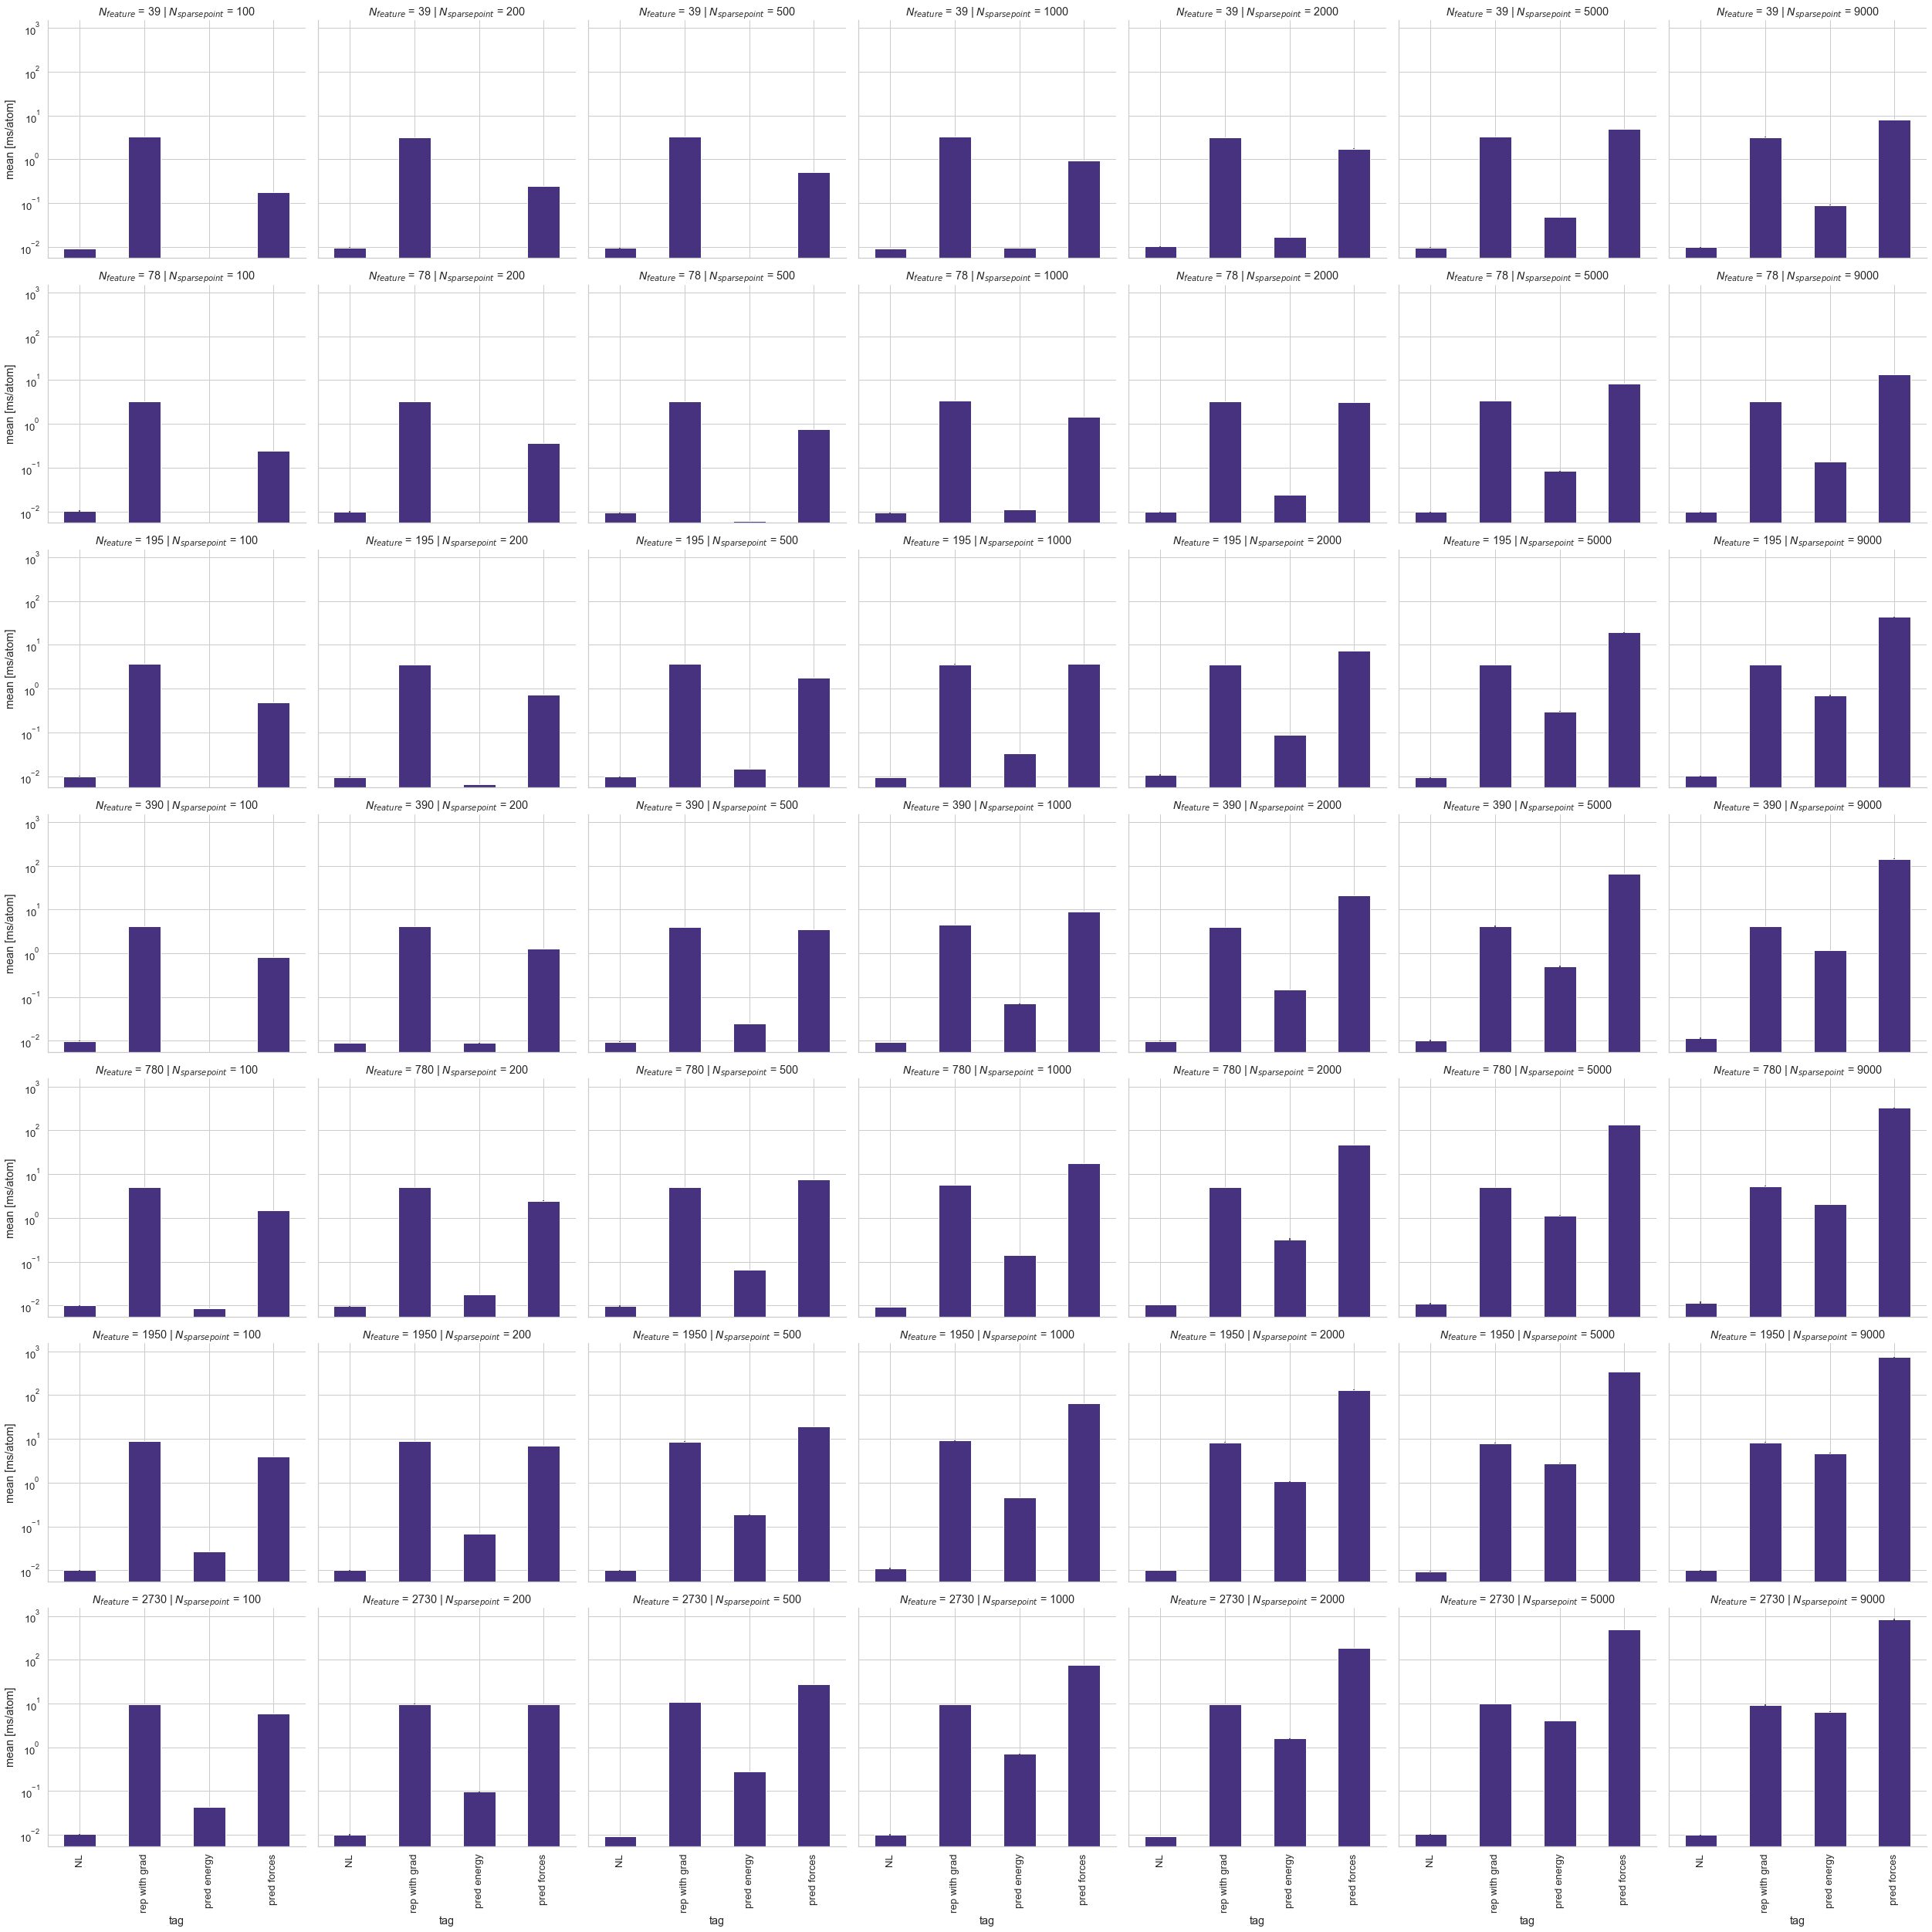

methane_sulfonic


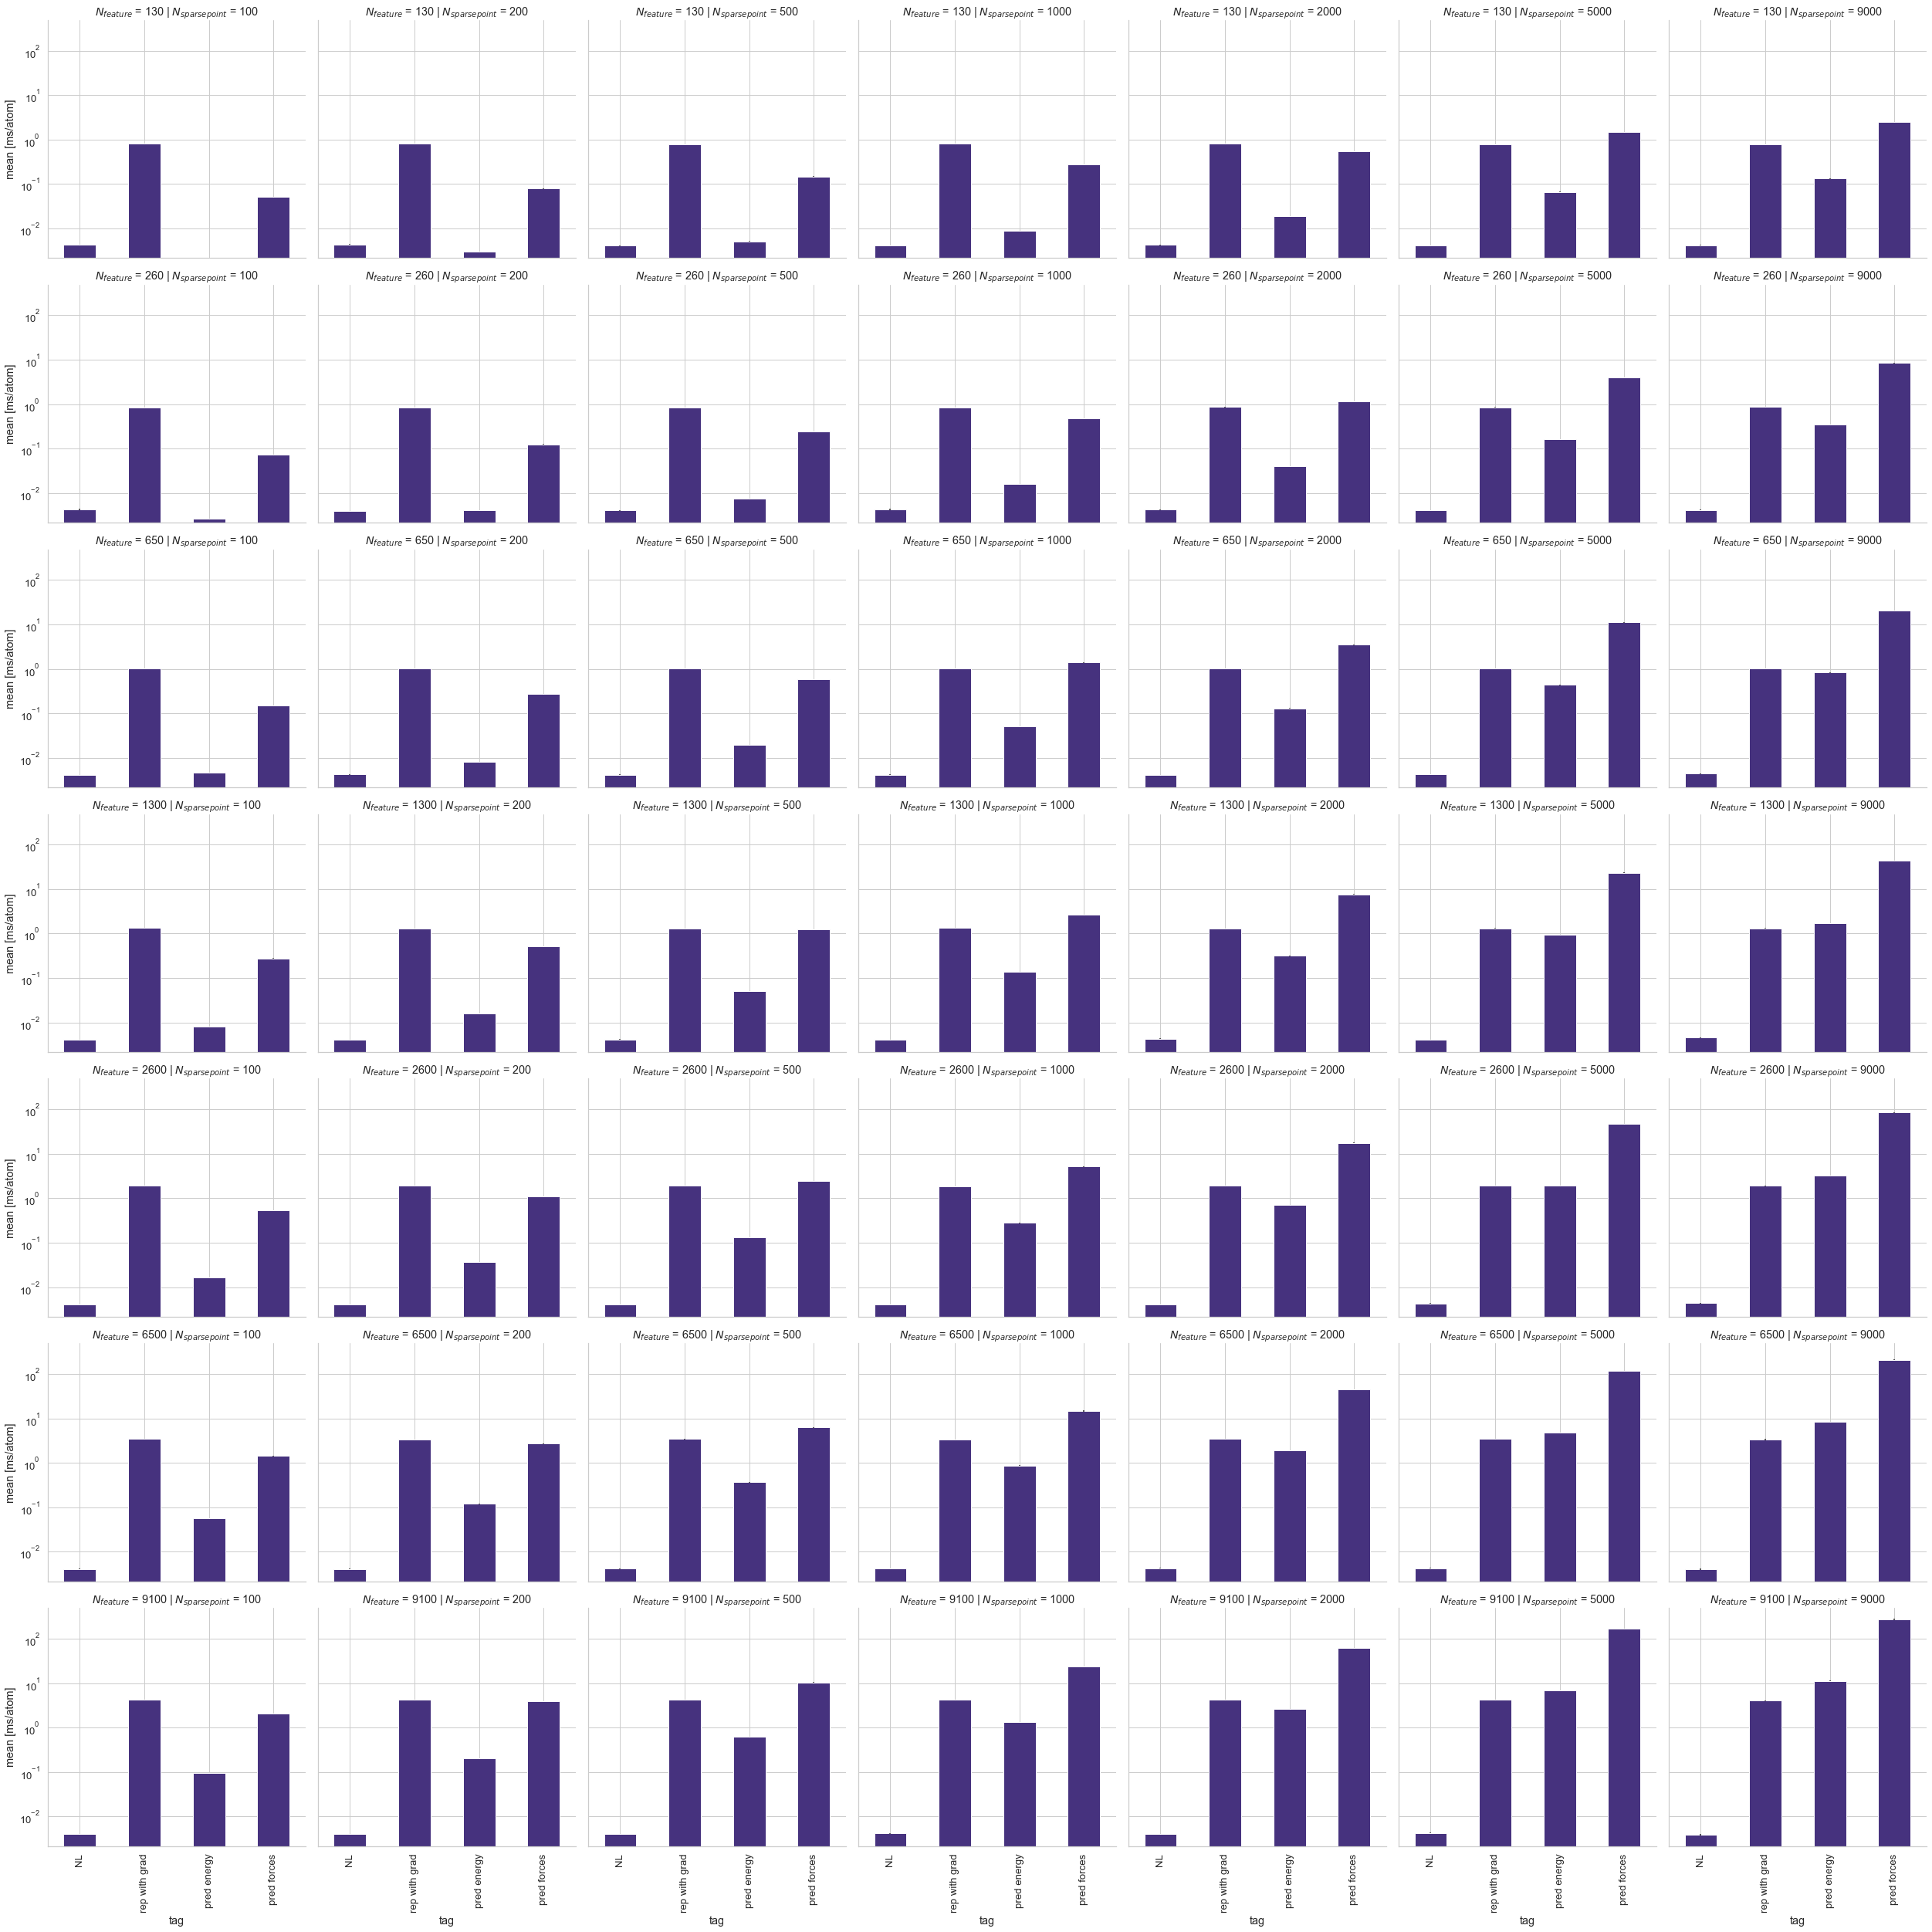

molecular_crystals


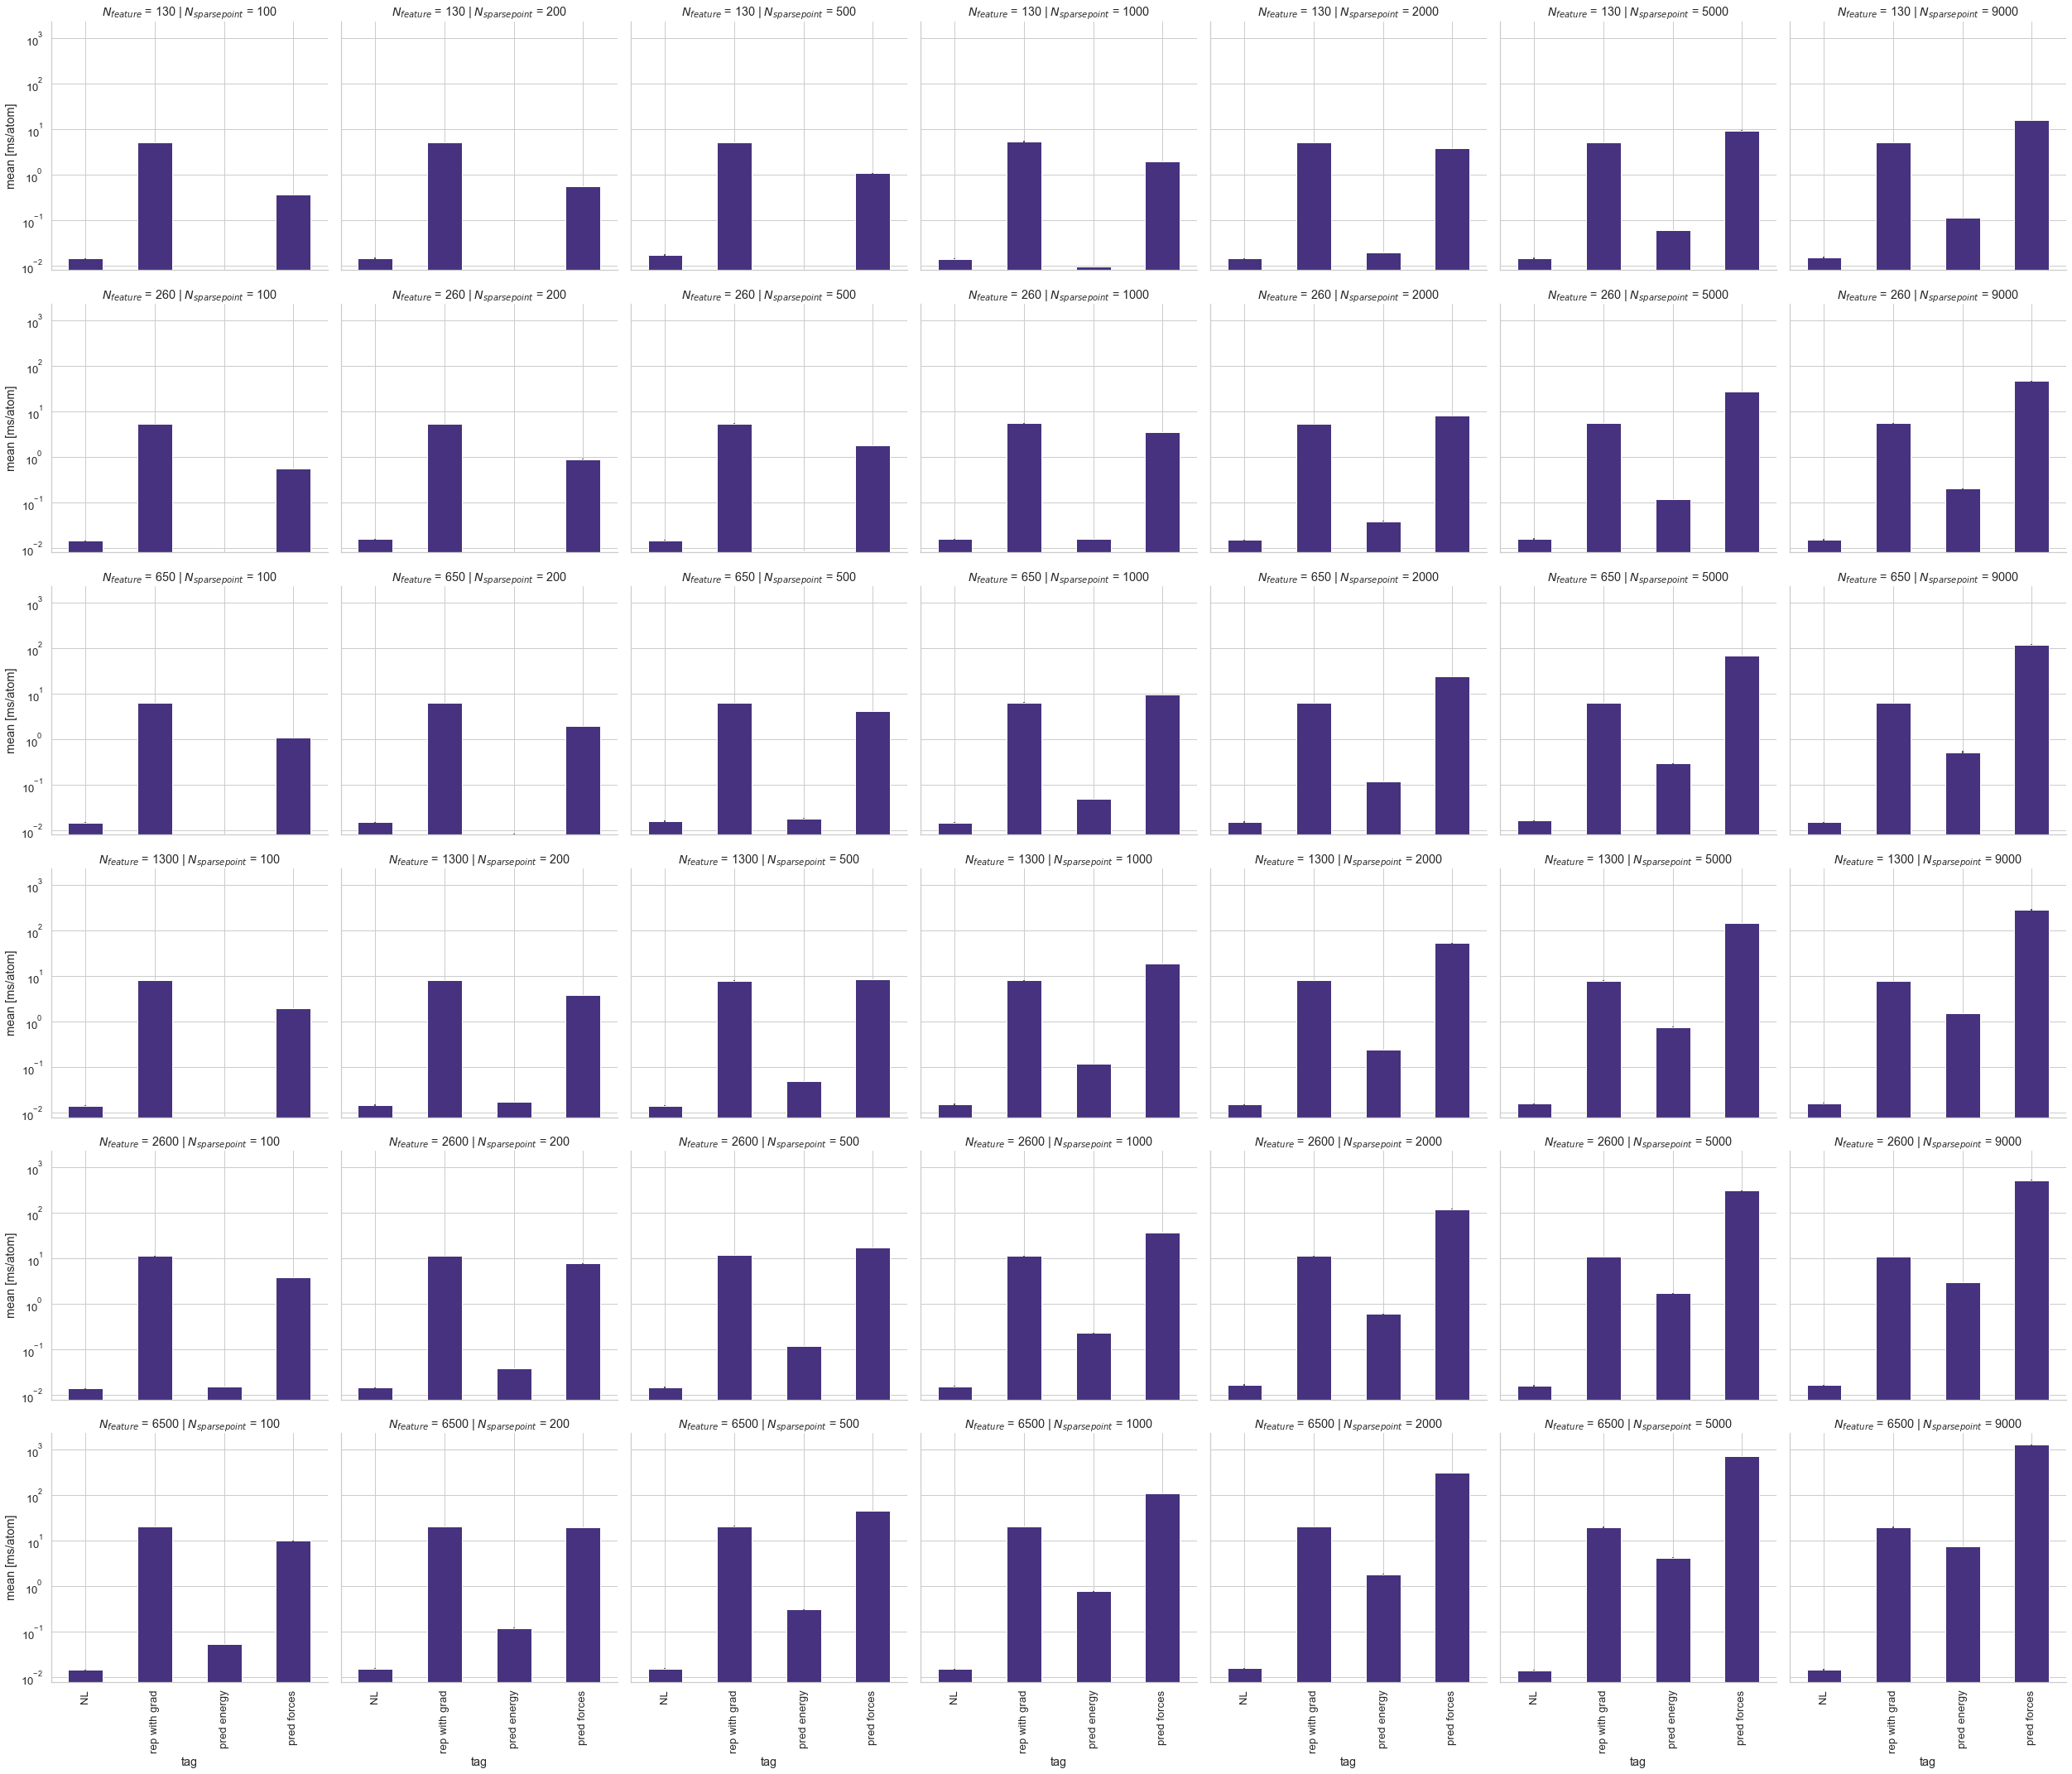

qm9


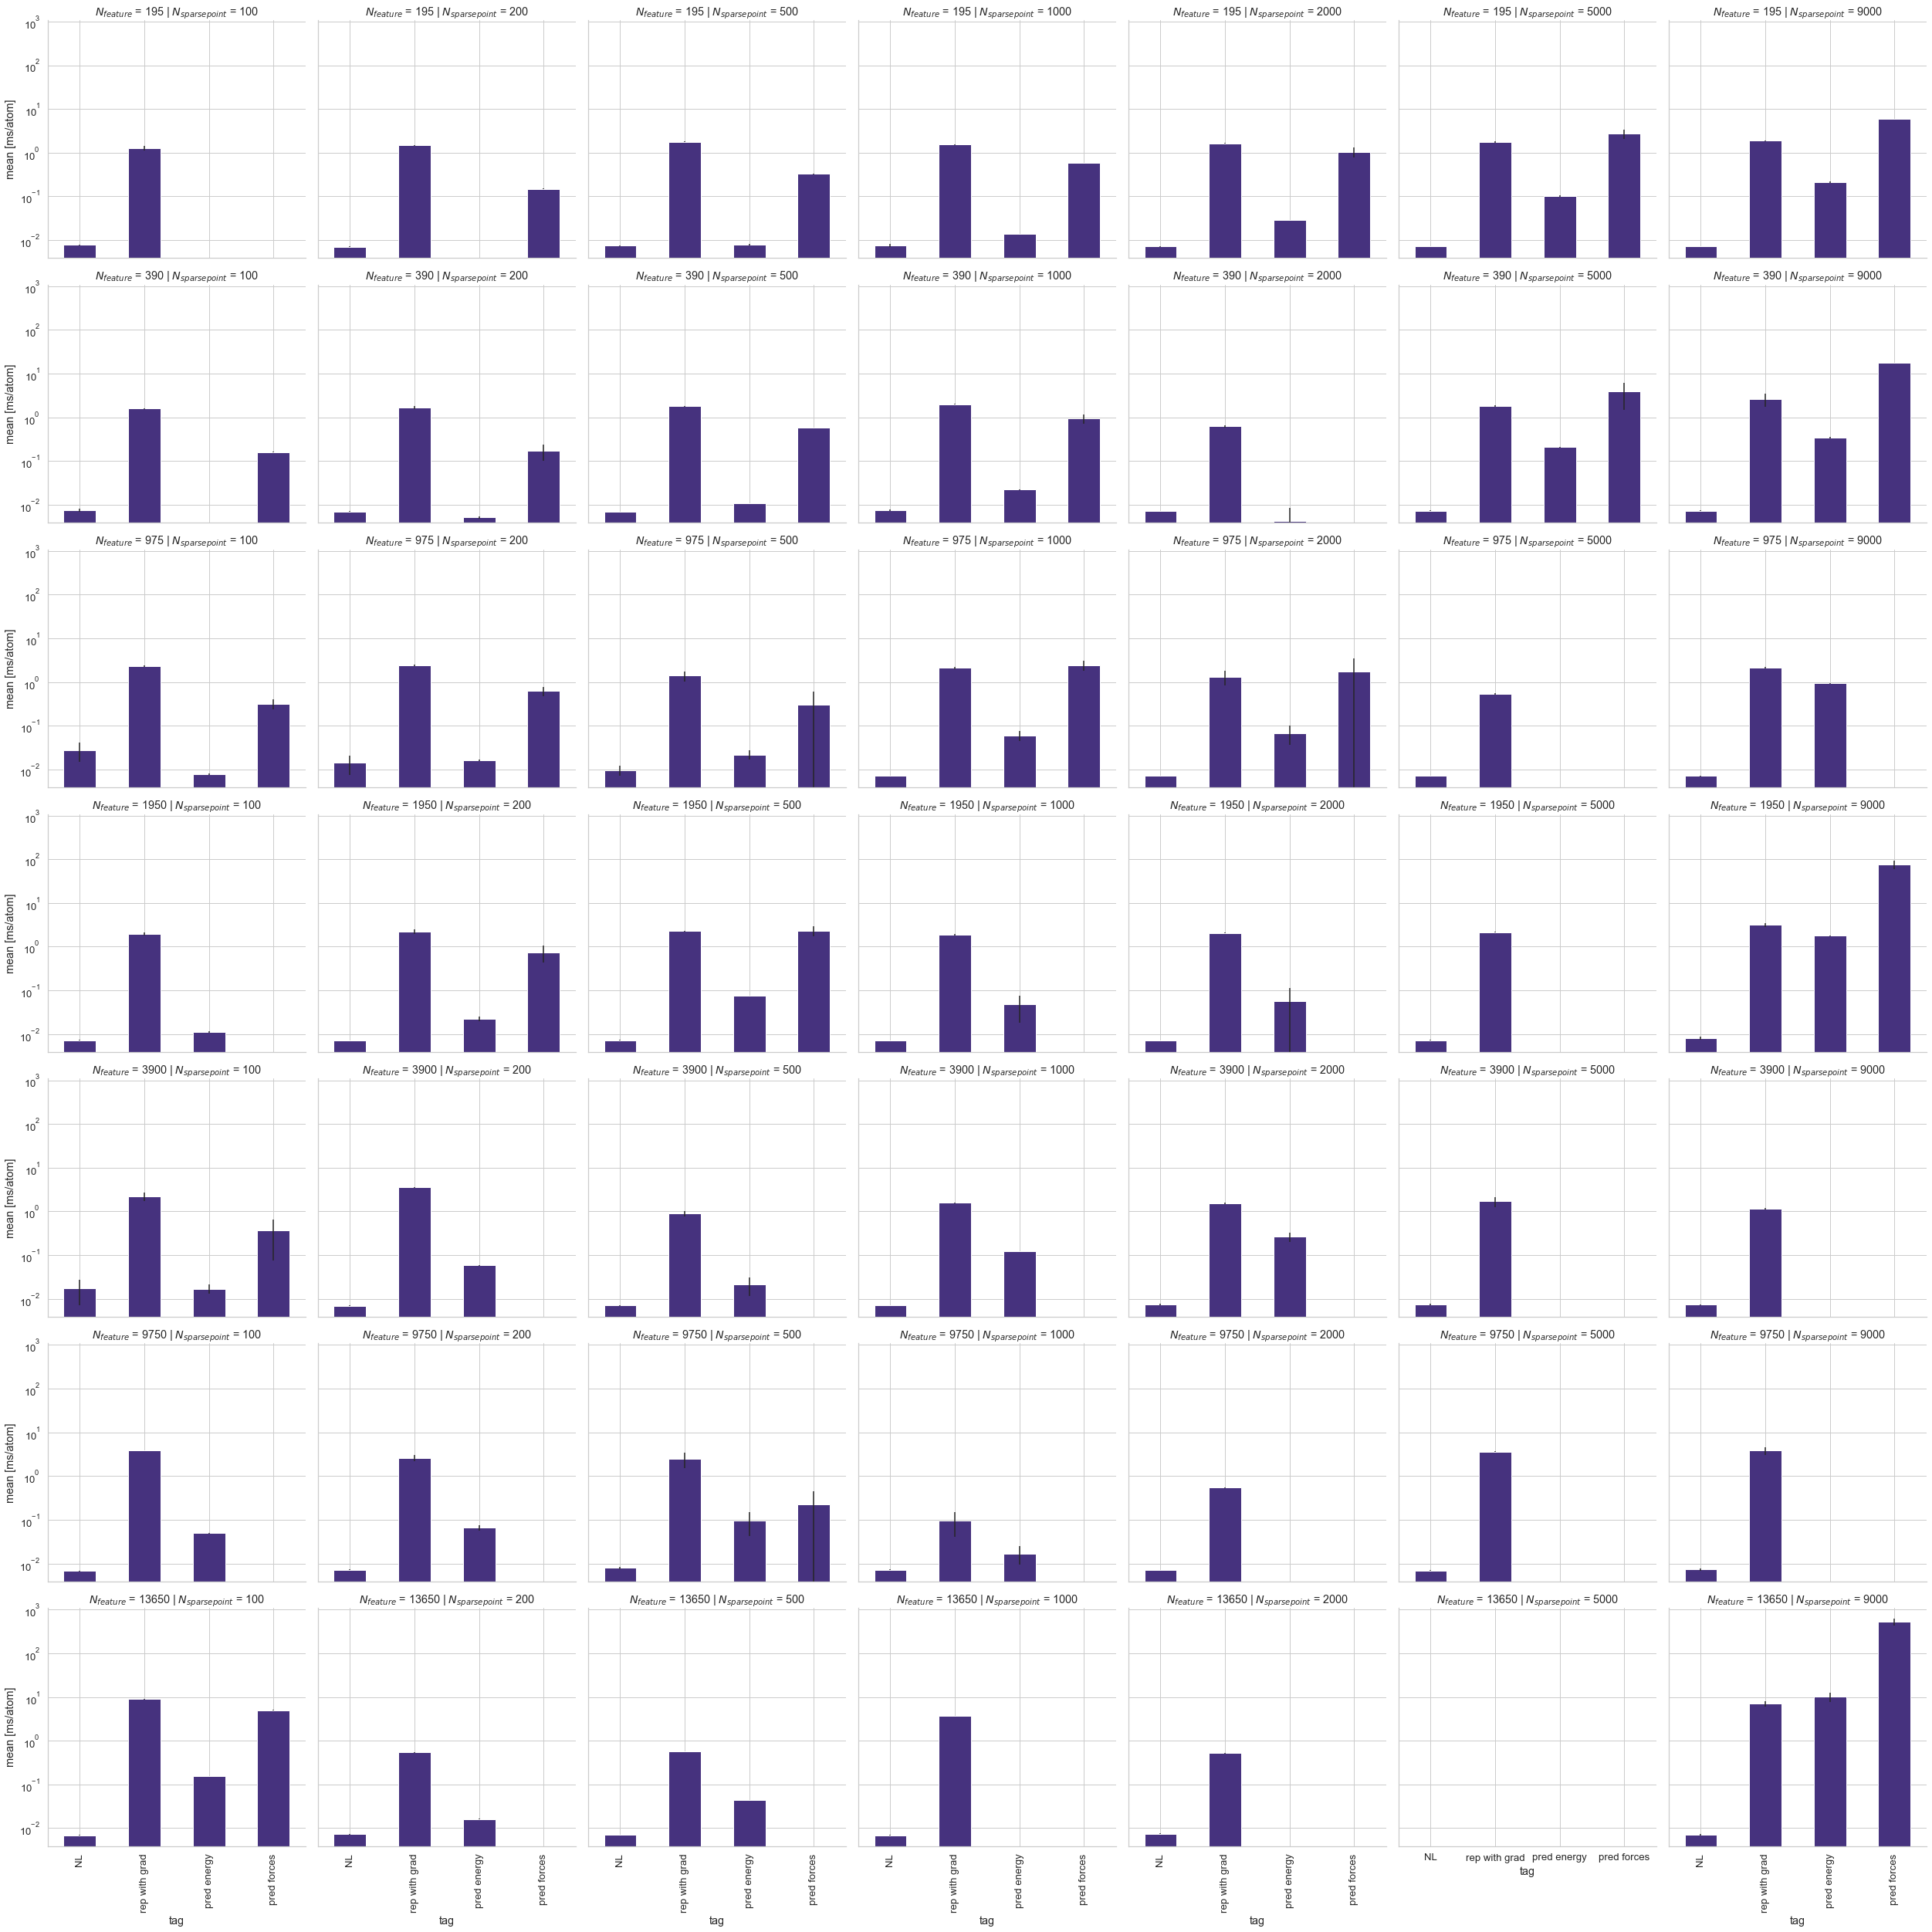

silicon_bulk


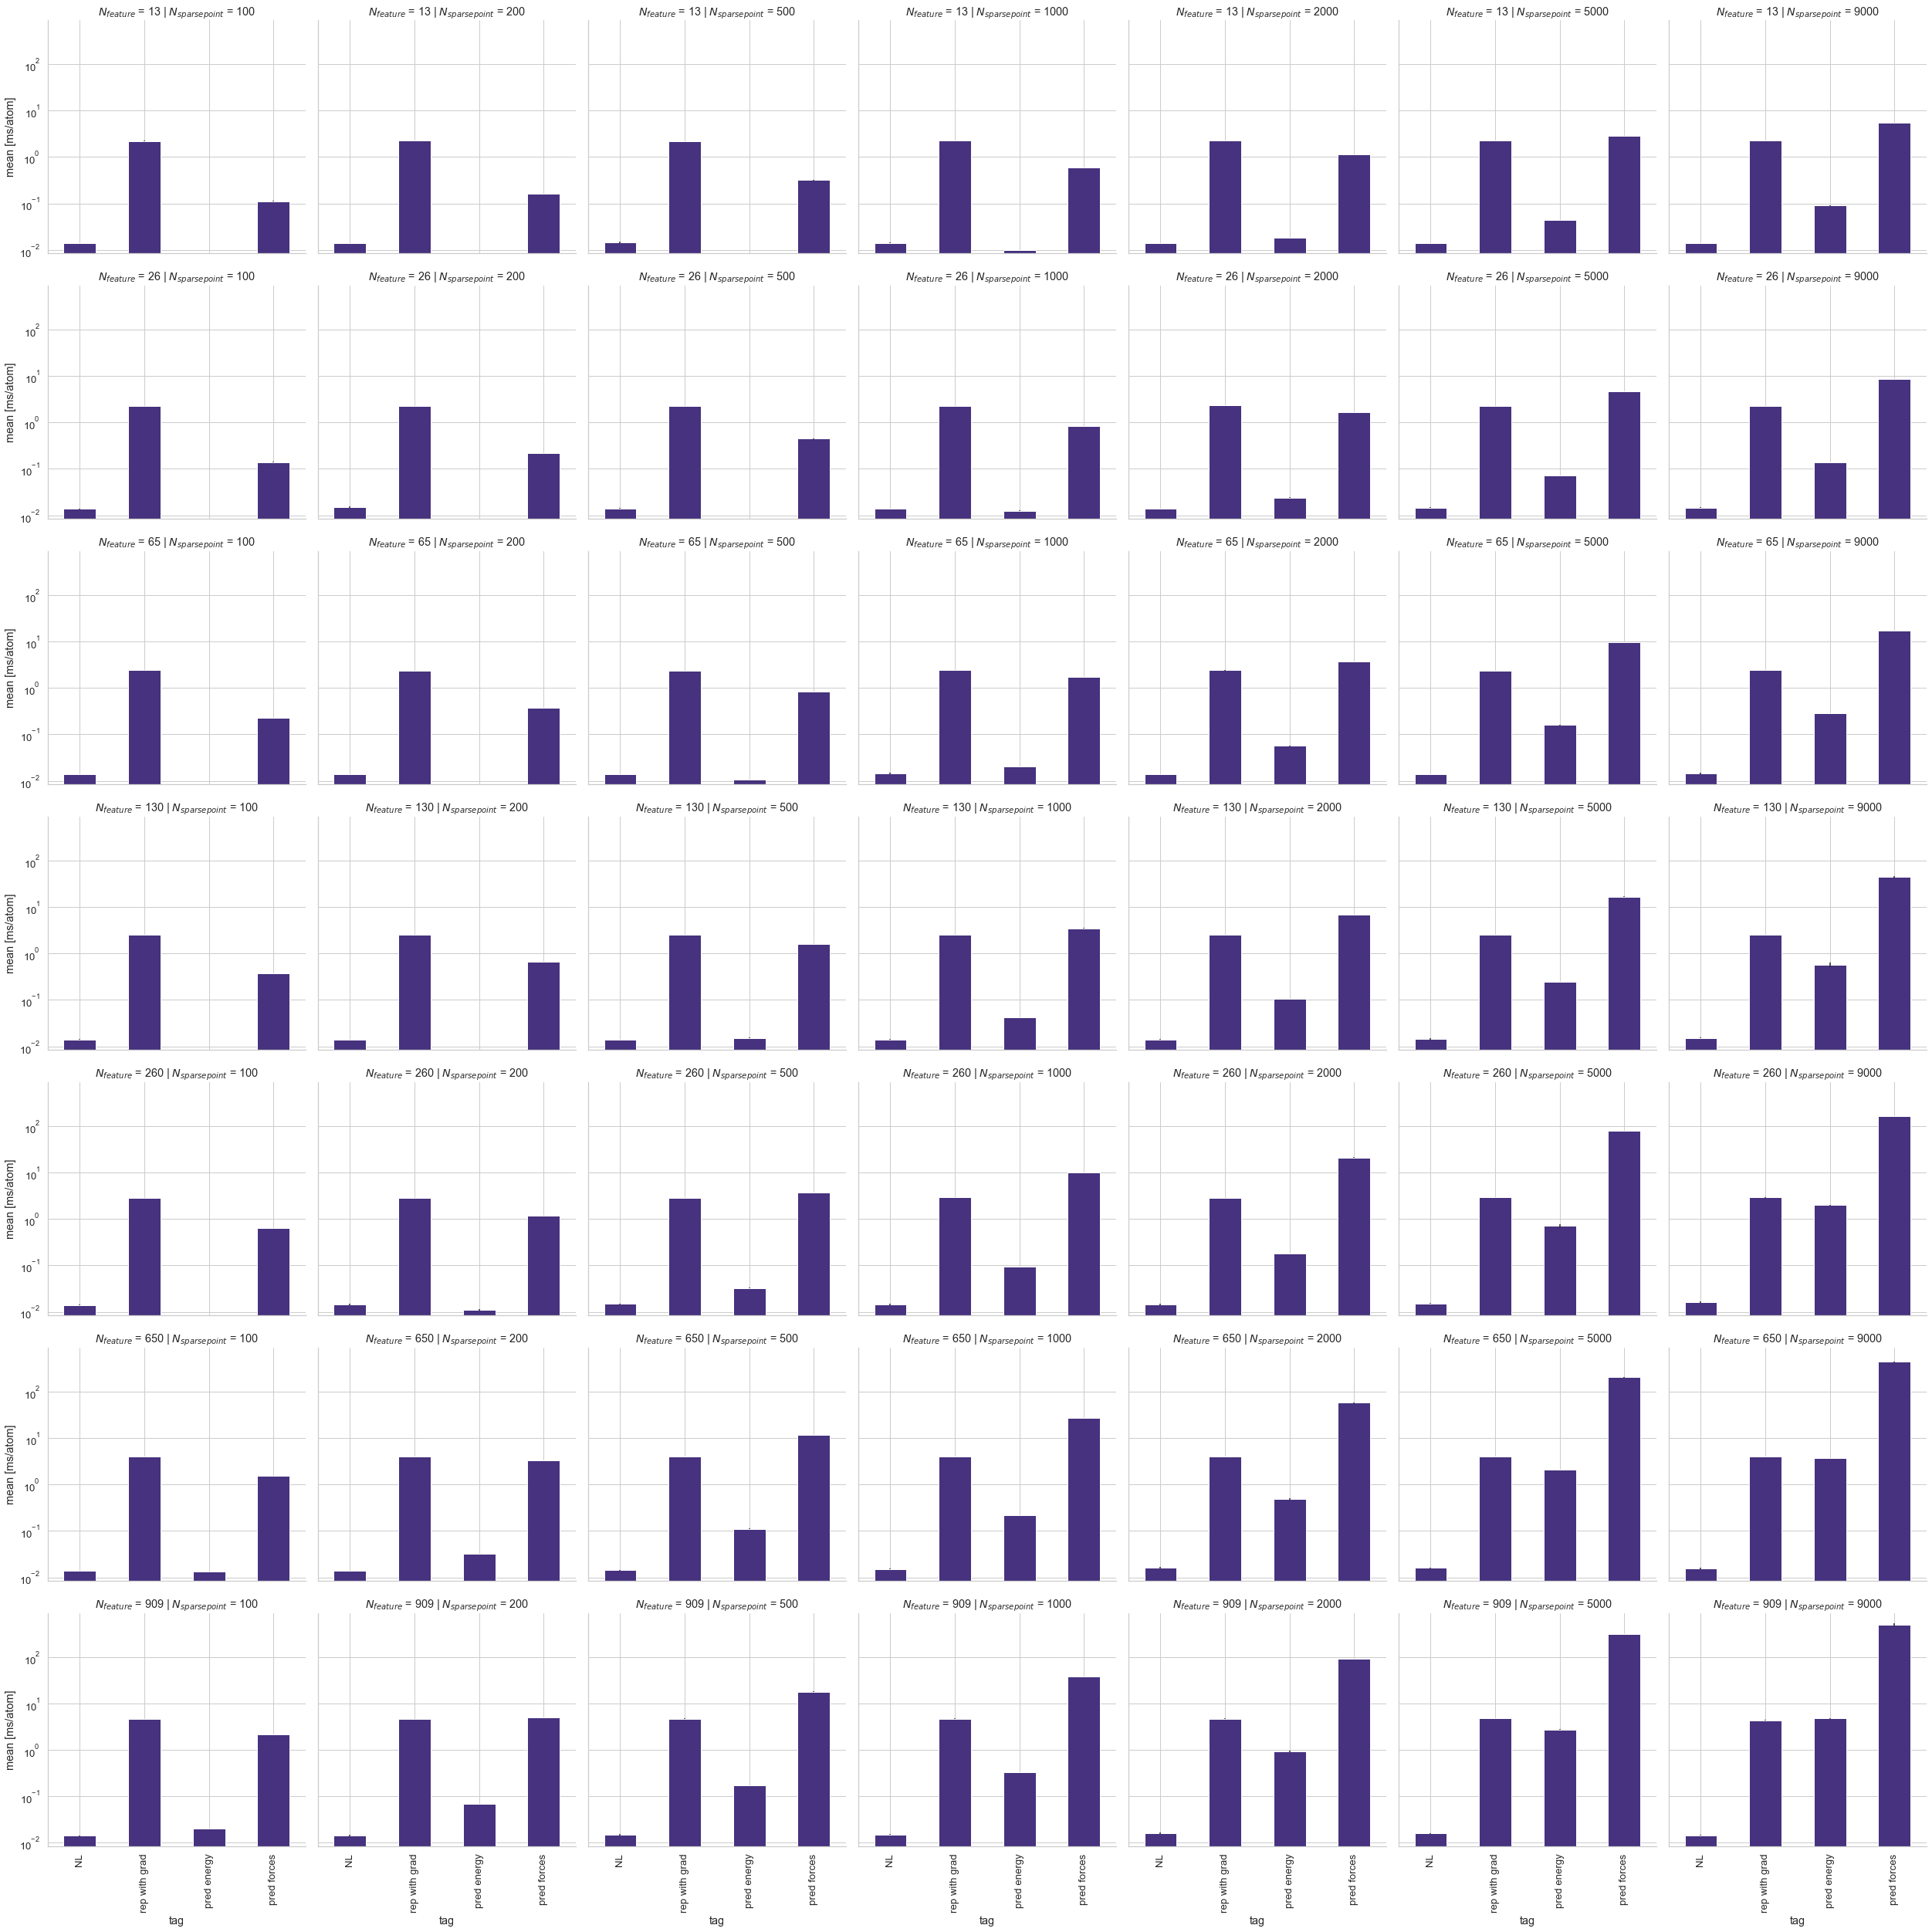

In [64]:
kwargs = dict(sharex=True, sharey=True, margin_titles=True)

for name,d in df.groupby('name'):
    print(name)
    plot_bar(d, x='tag', y='mean [ms/atom]', yerr='std [ms/atom]',title=name,
             col='$N_{sparse point}$',row='$N_{feature}$')
    plt.show()

In [19]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm
def plot_contour(df, x, y, values , row, col, **kwargs):
    vmin=df[values].min()
    vmax=df[values].max()
    g = sns.FacetGrid(df, col=col, row=row, height=5, **kwargs)
    g.map_dataframe(draw_heatmap, x, y, values, cmap=cmap, square=True, cbar=False,
                    vmin=vmin, vmax=vmax)
    # g.map(sns.heatmap, x, y, values, cmap=cmap, square=True, cbar_kws={'label': values})
    # plt.legend(title=hue,loc='upper right', bbox_to_anchor=(1.25, 1))
    fig = g.fig
    fig.tight_layout(h_pad=1.5, w_pad=1.5)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.2, 0.05, 0.7])
    norm = Normalize(vmin=vmin, vmax=vmax)
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, label= values)
    return g
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    d = d.sort_index('index',ascending=False) 
    sns.heatmap(d, **kwargs)

methane_liquid pred energy


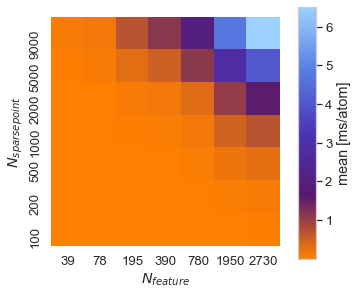

methane_liquid pred forces


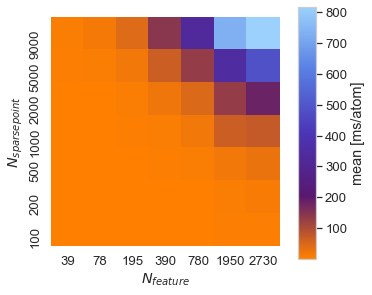

methane_liquid rep with grad


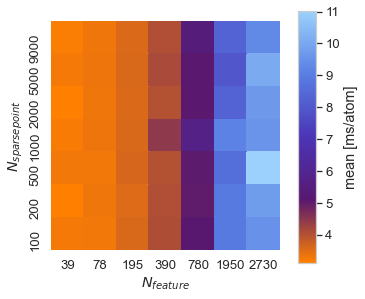

methane_sulfonic pred energy


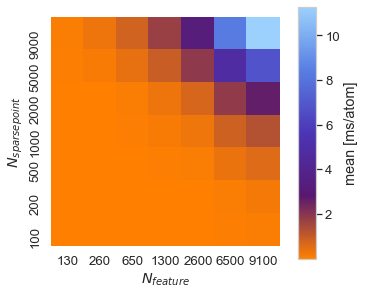

methane_sulfonic pred forces


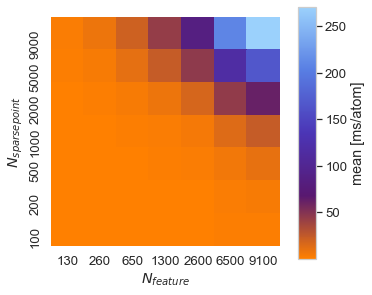

methane_sulfonic rep with grad


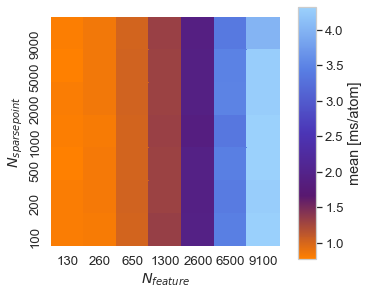

molecular_crystals pred energy


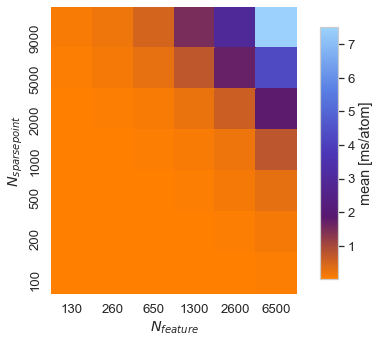

molecular_crystals pred forces


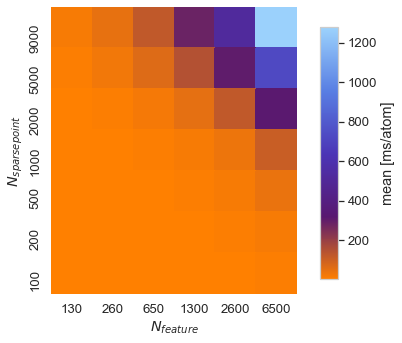

molecular_crystals rep with grad


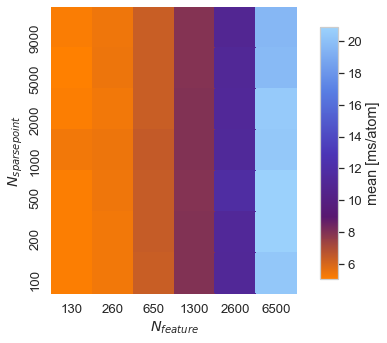

qm9 pred energy


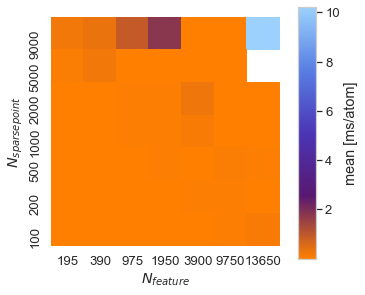

qm9 pred forces


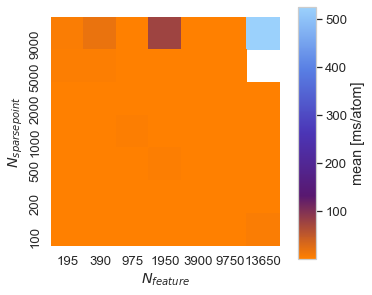

qm9 rep with grad


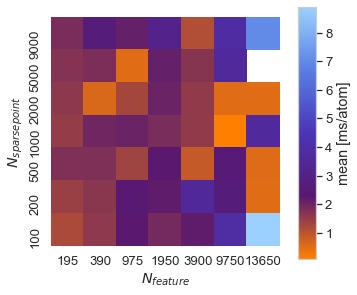

silicon_bulk pred energy


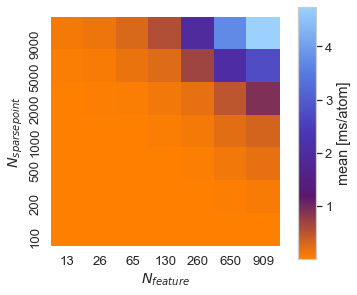

silicon_bulk pred forces


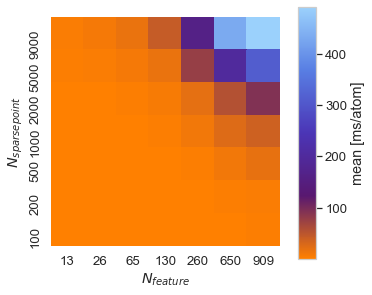

silicon_bulk rep with grad


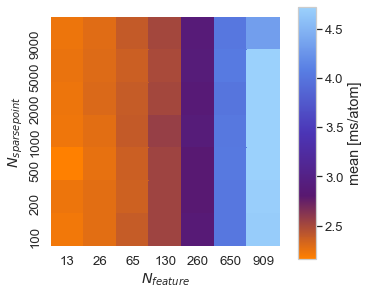

In [20]:
kwargs = dict(sharex=True, sharey=True, margin_titles=True)
for (name,tag),df_ in df.groupby(['name','tag']):
    if tag in ['NL']:
        continue
    print(name, tag)
    plot_contour(df_, x='$N_{feature}$', y='$N_{sparse point}$', values='mean [ms/atom]' , 
                 row=None, col=None, **kwargs)
    
    plt.show()

methane_liquid pred forces


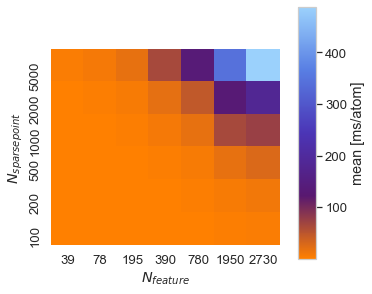

methane_sulfonic pred forces


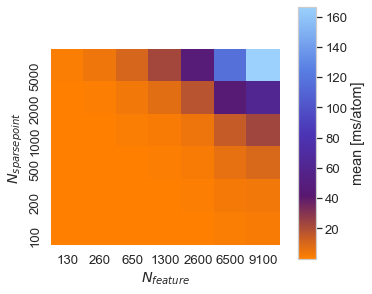

molecular_crystals pred forces


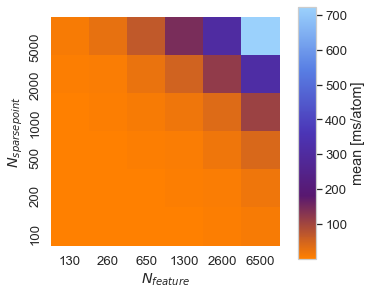

qm9 pred forces


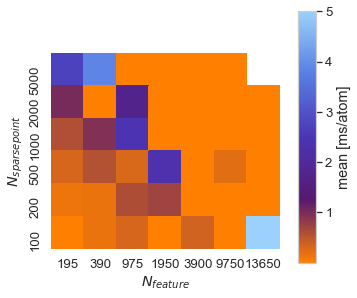

silicon_bulk pred forces


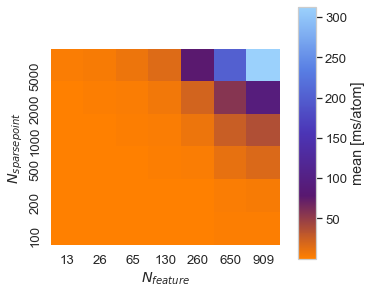

In [21]:
for (name,tag),df_ in df[df['$N_{sparse point}$'] <9000].groupby(['name','tag']):
    if tag not in ['pred forces']:
        continue
    print(name, tag)
    plot_contour(df_, x='$N_{feature}$', y='$N_{sparse point}$', values='mean [ms/atom]' , 
                 row=None, col=None, **kwargs)
    plt.show()

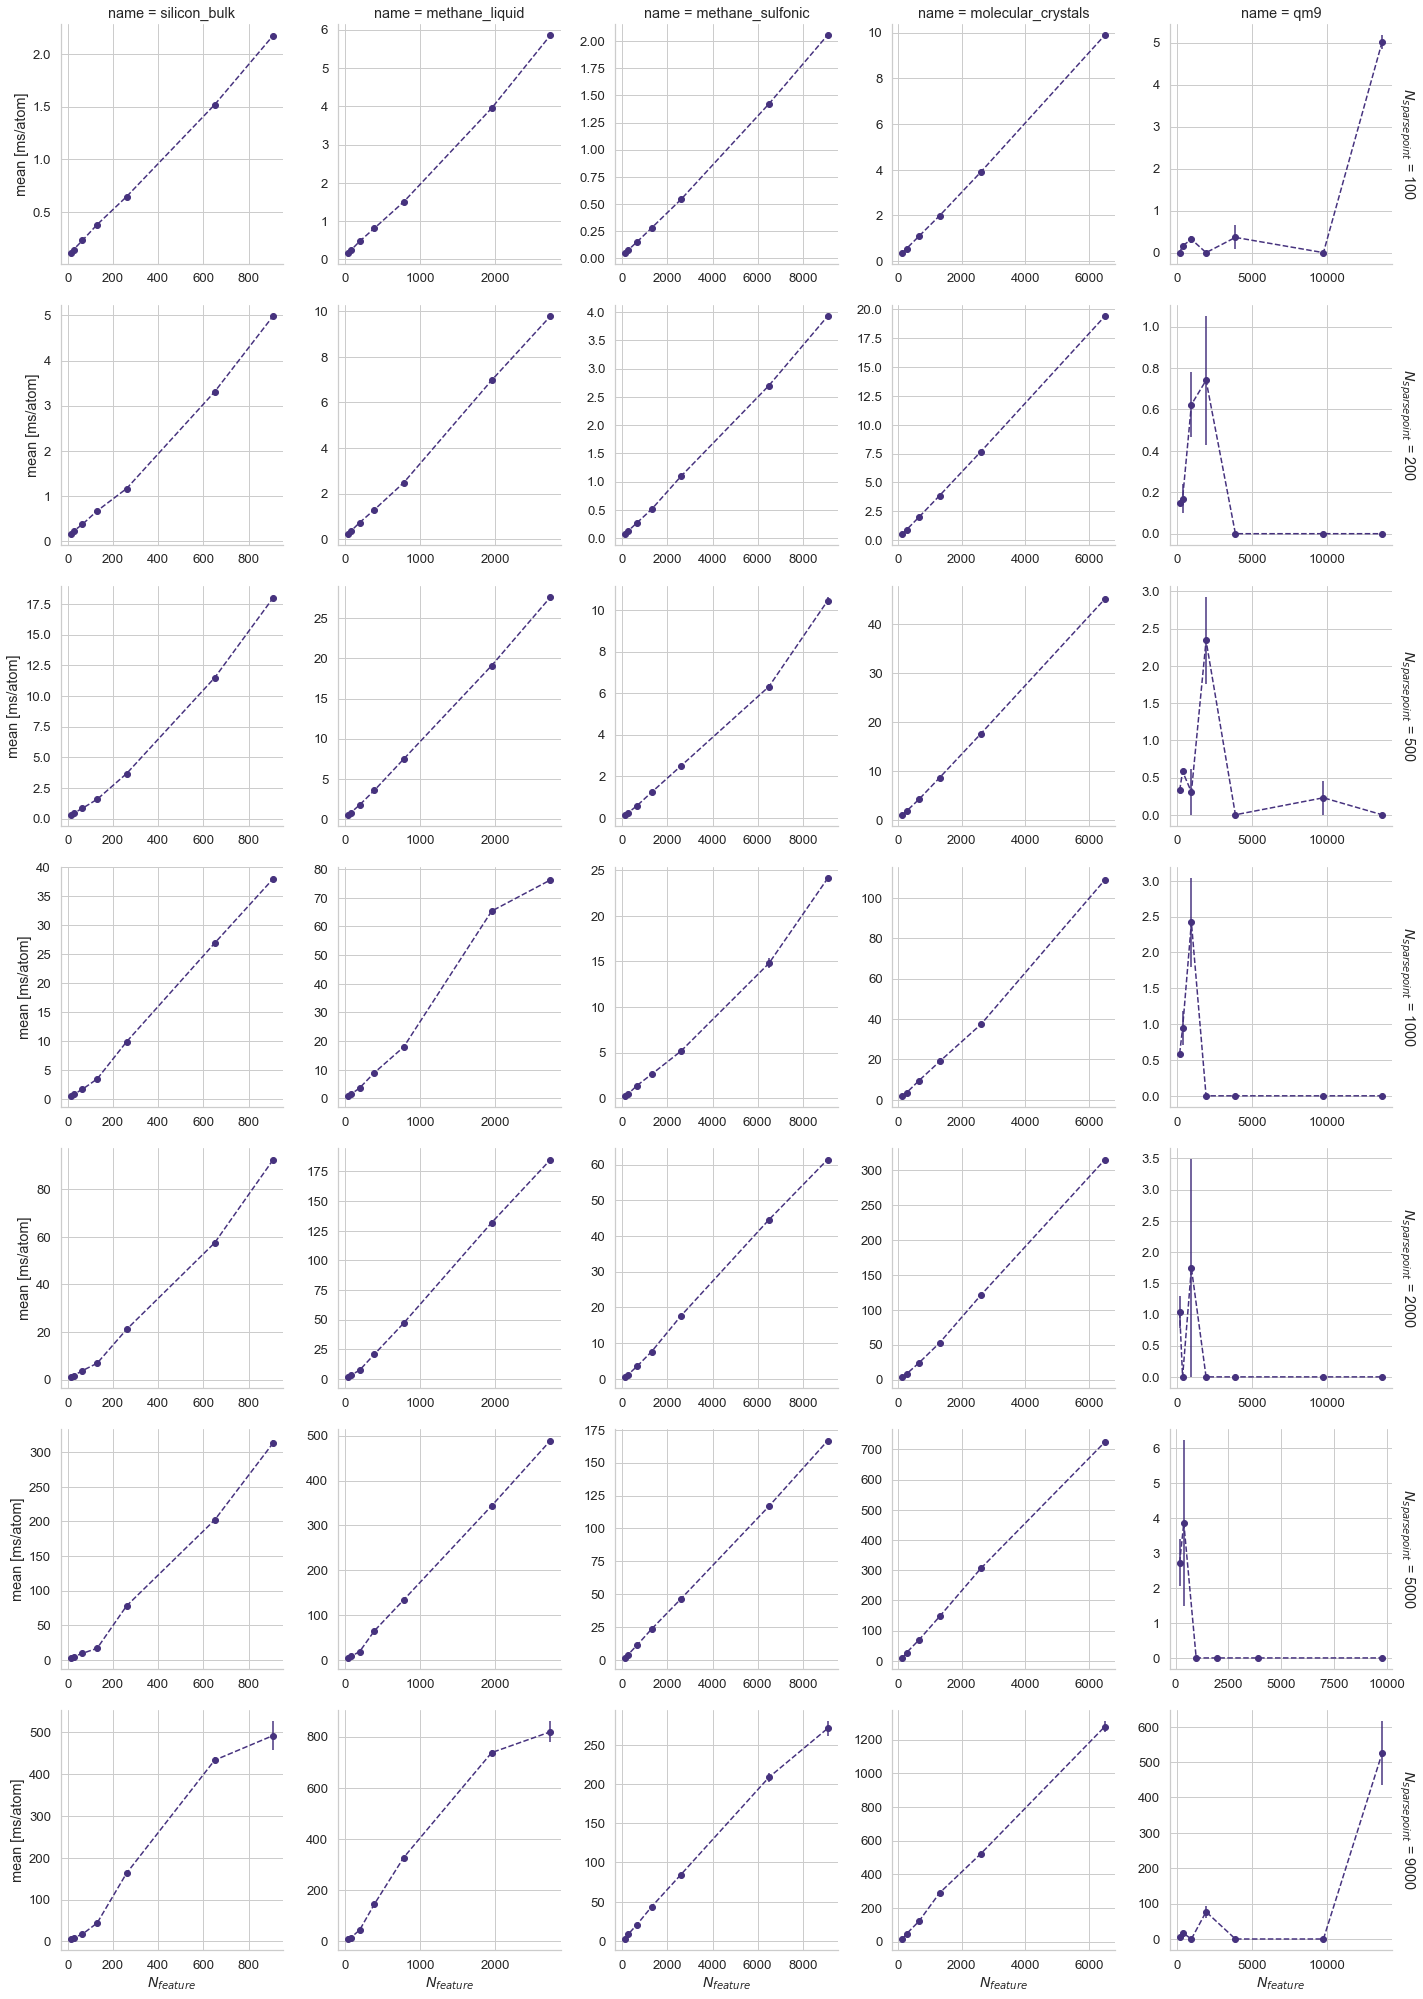

In [22]:
def plot_error(df, x, y, err , row, col, hue, **kwargs):
    g = sns.FacetGrid(df, col=col, row=row, hue=hue, height=4, **kwargs)
    g.map(plt.errorbar, x, y, err, marker="o", linestyle='--')
    return g
kwargs = dict(sharex=False, sharey=False, margin_titles=True)

aa = df[df['tag'] == 'pred forces'].sort_values('$N_{feature}$')
plot_error(aa, '$N_{feature}$', 'mean [ms/atom]', 'std [ms/atom]', 
            '$N_{sparse point}$', 'name', None, **kwargs)

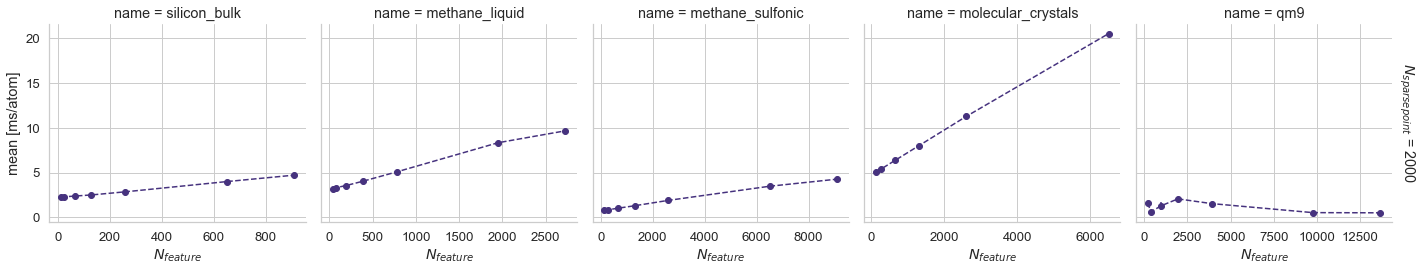

In [31]:
kwargs = dict(sharex=False, sharey=True, margin_titles=True)

aa = df.query("tag=='rep with grad' & `$N_{sparse point}$`==2000").sort_values('$N_{feature}$')
plot_error(aa, '$N_{feature}$', 'mean [ms/atom]', 'std [ms/atom]', 
            '$N_{sparse point}$', 'name', None, **kwargs)

In [ ]:
aa = df.query("tag=='rep with grad' & `$N_{sparse point}$`==2000").sort_values('$N_{feature}$')


methane_liquid


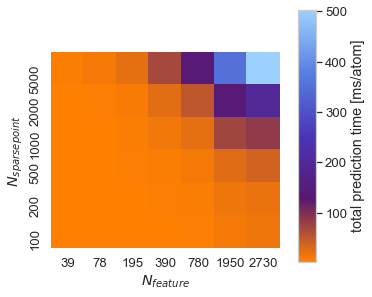

methane_sulfonic


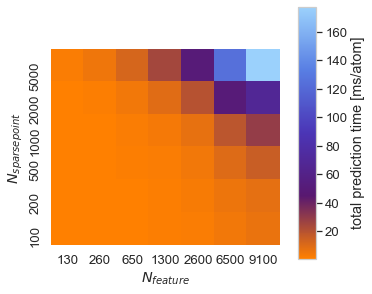

molecular_crystals


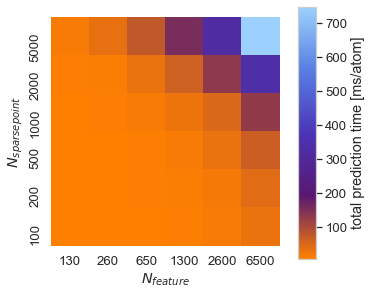

qm9


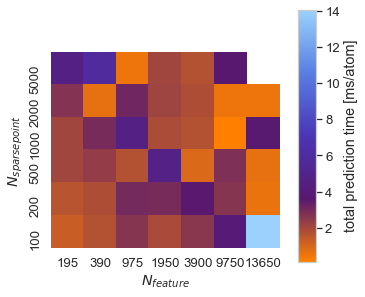

silicon_bulk


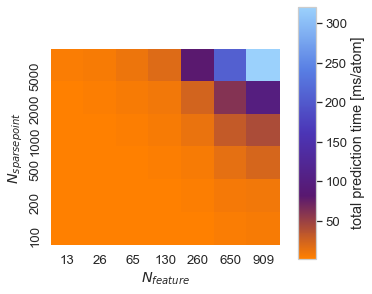

In [72]:
dd = df[df['$N_{sparse point}$'] <9000].groupby(['name','$N_{feature}$','$N_{sparse point}$']).agg(
    total=('mean [ms/atom]', np.sum)
).reset_index()
dd=dd.rename(columns={'total':'total prediction time [ms/atom]'})
for name, df_ in dd.groupby('name'):
    print(name)
    plot_contour(df_, x='$N_{feature}$', y='$N_{sparse point}$', values='total prediction time [ms/atom]' , 
                 row=None, col=None, **kwargs)
    plt.show()

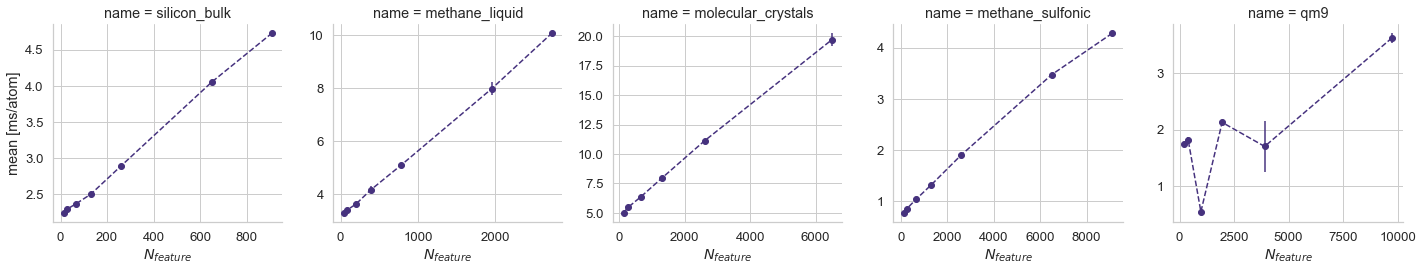

In [111]:
aa = df[df['tag'] == 'rep with grad'].query('`$N_{sparse point}$` == 5000').sort_values('$N_{feature}$')
plot_error(aa, '$N_{feature}$', 'mean [ms/atom]', 'std [ms/atom]', 
            None, 'name', None, **kwargs)

# model 5

In [54]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [55]:
job.document

{'benchmark': [{'tag': 'NL', 'mean': 0.034583994559943675, 'stdev': 0.0009724582269846387, 'min': 0.03321942687034607, 'max': 0.036222434137016535, 'samples': [0.03473200183361769, 0.036222434137016535, 0.03418470872566104, 0.03456140123307705, 0.03321942687034607], 'name': 'methane_liquid', 'n_atoms': 3645}, {'tag': 'rep with grad', 'mean': 14.680874564312399, 'stdev': 0.07466513134621502, 'min': 14.609343358781189, 'max': 14.793248774949461, 'samples': [14.629919921979308, 14.624765709973872, 14.609343358781189, 14.793248774949461, 14.747095055878162], 'name': 'methane_liquid', 'n_atoms': 3645}, {'tag': 'pred energy', 'mean': 0.09162159748375416, 'stdev': 0.0019113283000082811, 'min': 0.09027788927778602, 'max': 0.09535313211381435, 'samples': [0.09535313211381435, 0.09034157916903496, 0.09069092385470867, 0.09144446300342679, 0.09027788927778602], 'name': 'methane_liquid', 'n_atoms': 3645}, {'tag': 'pred forces', 'mean': 12.942573427967726, 'stdev': 0.06328977233023365, 'min': 12.87

In [56]:
job.sp

{'representation': {'interaction_cutoff': 5.0, 'cutoff_smooth_width': 0.5, 'max_radial': 10, 'max_angular': 12, 'gaussian_sigma_type': 'Constant', 'soap_type': 'PowerSpectrum', 'normalize': True, 'expansion_by_species_method': 'structure wise', 'global_species': [1, 6], 'compute_gradients': False, 'cutoff_function_parameters': {}, 'cutoff_function_type': 'ShiftedCosine', 'gaussian_sigma_constant': 0.4, 'coefficient_subselection': None, 'radial_basis': 'GTO', 'optimization_args': {'type': 'Spline', 'accuracy': 1e-08, 'range': [0, 5]}}, 'kernel': {'name': 'GAP', 'zeta': 2, 'target_type': 'Structure', 'kernel_type': 'Sparse'}, 'name': 'methane_liquid', 'filename': '../../structures/methane_liquid.json', 'self_contributions': {'1': 0, '6': 0}, 'train_with_grad': False, 'sparse_point_subselection': {'Nselect': {'1': 250, '6': 250}, 'act_on': 'sample per species', 'seed': 10}, 'feature_subselection': {'Nselect': 390, 'act_on': 'feature', 'seed': 10}, 'N_ITERATIONS': 5, 'start_structure': 100

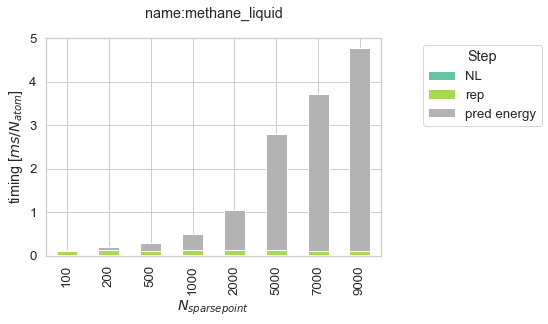

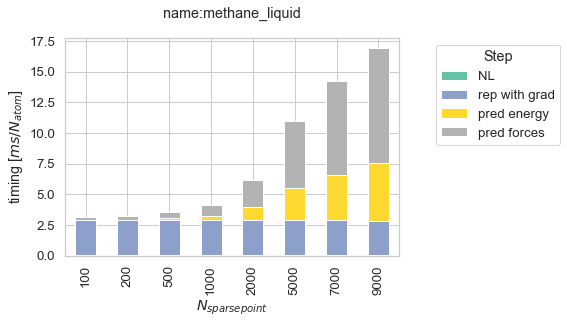

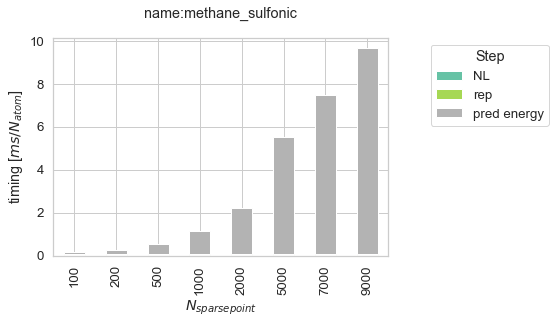

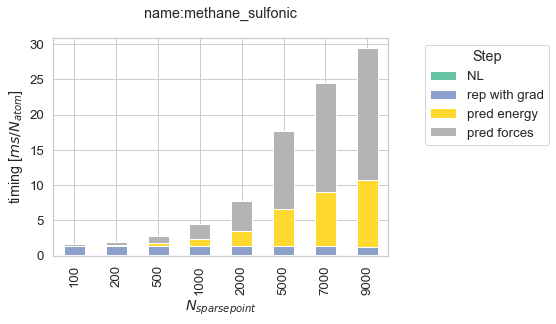

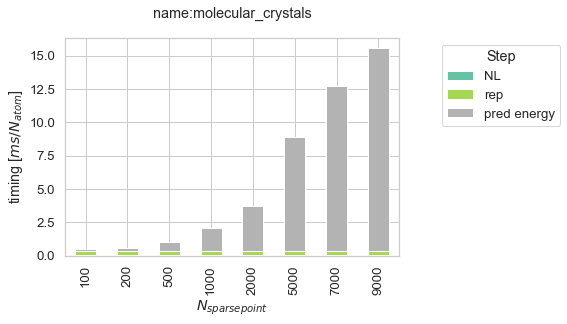

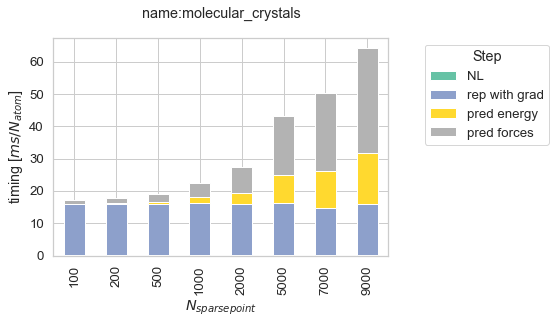

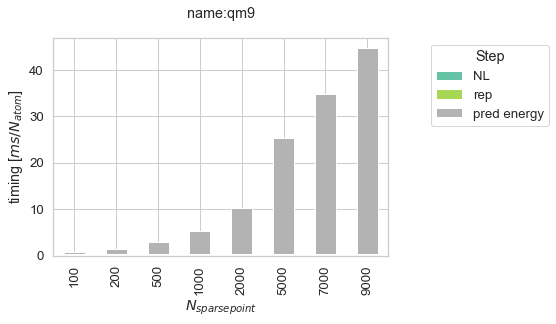

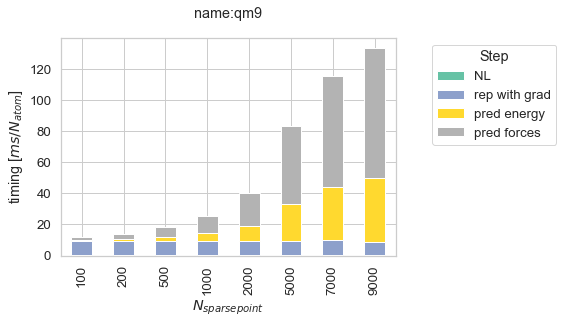

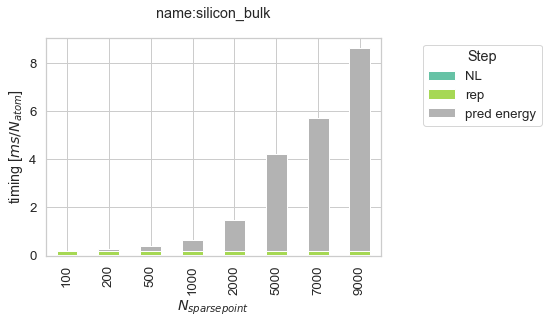

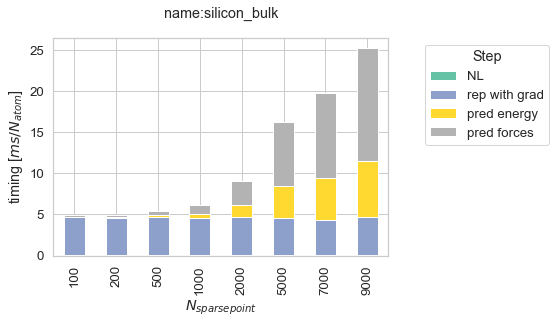

In [21]:

project = signac.get_project(fn_projects['m2'])
qry = {'feature_subselection.Nselect':{'$eq':None}, 
       'representation.normalize':{'$eq':True},
      }
aa = []
order = {True:['NL', 'rep with grad', 'pred energy', 'pred forces'],
        False:['NL', 'rep', 'pred energy']}

for job in project.find_jobs(qry):
    if len(job.document) == 0: continue
    if job.sp.representation['interaction_cutoff'] != 5.: print('asdfasdf')
    # print(job.sp.sparse_point_subselection)
    ee = job.document.benchmark
    
    for v in ee:
        v['$N_{sparse point}$'] = np.sum(list(job.sp.sparse_point_subselection.Nselect.values()))
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
        v['grads_timing'] = job.sp.grads_timing
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']
for (name,grads_timing), df_ in df.groupby(['name','grads_timing']):
    df2 = df_.pivot_table(index='$N_{sparse point}$', columns='tag', values='mean [ms/atom]')
    df2.reindex(columns=order[grads_timing]).plot(kind='bar', stacked=True, colormap="Set2")
    title = ' / '.join(['name:{}'.format(name,grads_timing)])
    plt.title(title,pad=20)
    plt.ylabel('timing [$ms/N_{atom}$]')
    plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.5, 1))
    # plt.yscale('log')
    # ax = plt.gca()
    # ax.yaxis.set_major_locator(MultipleLocator(10))
    # ax.yaxis.grid(True, which='minor')
    # ax.yaxis.set_minor_locator(MultipleLocator(2))
    fname = 'model-sample_sparsification-{}-{}.png'.format(name,grads_timing)
    # plt.savefig(fpfx+fname, dpi=300, bbox_inches='tight')
    plt.show()

In [17]:
df

tag      mean     stdev       min       max  \
0               NL  0.020461  0.000783  0.019875  0.021964   
1    rep with grad  6.727558  0.053945  6.679963  6.830890   
2      pred energy  0.052233  0.000724  0.051418  0.053460   
3      pred forces  0.259972  0.004233  0.254712  0.267597   
4               NL  0.014650  0.000377  0.014364  0.015390   
..             ...       ...       ...       ...       ...   
275            rep  0.444339  0.004242  0.438635  0.449729   
276    pred energy  0.167448  0.003831  0.160330  0.171330   
277             NL  0.020039  0.000327  0.019473  0.020488   
278            rep  0.237978  0.003381  0.232751  0.241876   
279    pred energy  0.669488  0.005245  0.665830  0.679878   

                                               samples                name  \
0    [0.019875409081578255, 0.020494359079748392, 0...        silicon_bulk   
1    [6.830890231067315, 6.679962505819276, 6.72547...        silicon_bulk   
2    [0.0534604717977345, 0.05141827999614179, 0.05...        silicon_bulk   
3    [0.2675969412084669, 0.25970616983249784, 0.25...        silicon_bulk   
4    [0.014502625912427902, 0.0143639100715518, 0.0...                 qm9   
..                                                 ...                 ...   
275  [0.44257470895536244, 0.448777224868536, 0.449...  molecular_crystals   
276  [0.17132970690727234, 0.16960682813078165, 0.1...  molecular_crystals   
277  [0.02000302798114717, 0.020099675050005317, 0....        silicon_bulk   
278  [0.24138139211572707, 0.23626782884821296, 0.2...        silicon_bulk   
279  [0.6798780499957502, 0.6658303220756352, 0.666...        silicon_bulk   

     n_atoms  $N_{sparse point}$  mean [ms/atom]  grads_timing  
0       1458                 100        0.014034          True  
1       1458                 100        4.614237          True  
2       1458                 100        0.035825          True  
3       1458                 100        0.178307          True  
4       1801                9000        0.008135         False  
..       ...                 ...             ...           ...  
275     1408                 100        0.315582         False  
276     1408                 100        0.118926         False  
277     1458                1000        0.013744         False  
278     1458                1000        0.163222         False  
279     1458                1000        0.459182         False  

[280 rows x 11 columns]

In [117]:
aa = []
qry = {'feature_subselection.Nselect':{'$ne':None},
       }
for job in project.find_jobs(qry):
    if len(job.document) == 0: continue
    aa.append({'name':job.sp.name, 'N':job.sp.feature_subselection.Nselect})
df = pd.DataFrame(aa)
names = df.name.unique()
aa = {}
for name in names:
    aa[name] = np.sort(df[df['name']==name].N.unique())[-1]
aa

{'methane_liquid': 952,
 'methane_sulfonic': 3696,
 'silicon_bulk': 715,
 'qm9': 18300,
 'molecular_crystals': 6660}

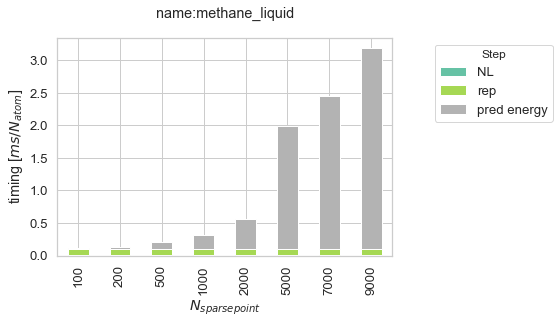

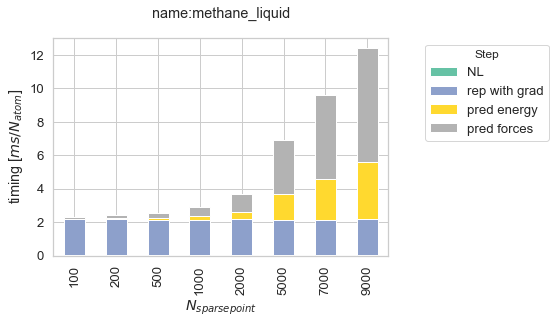

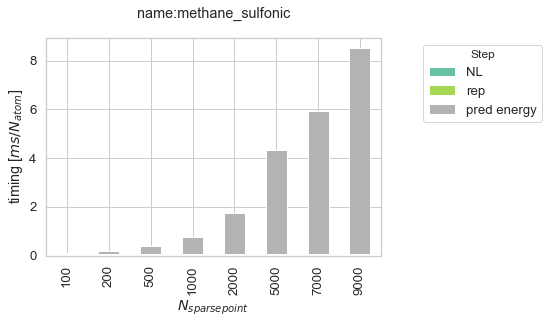

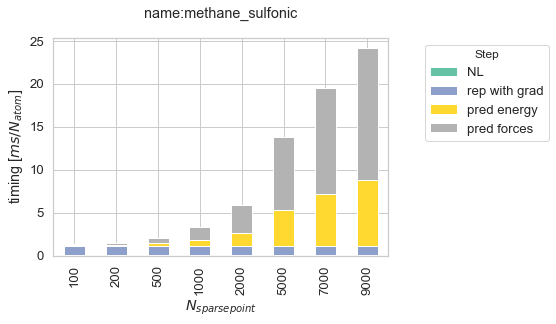

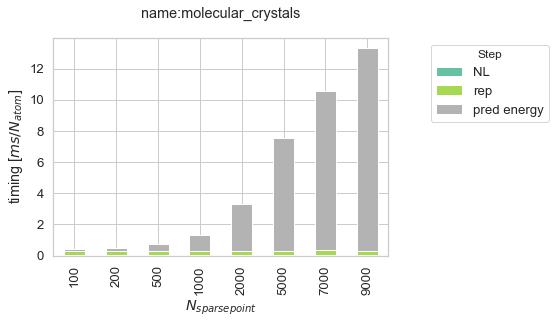

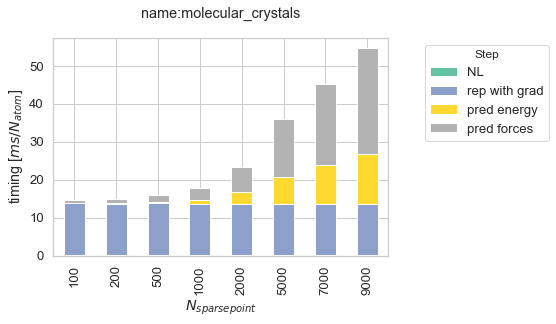

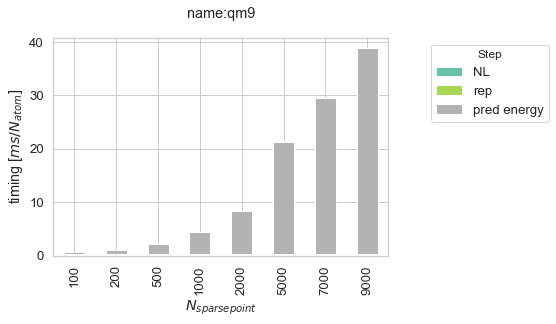

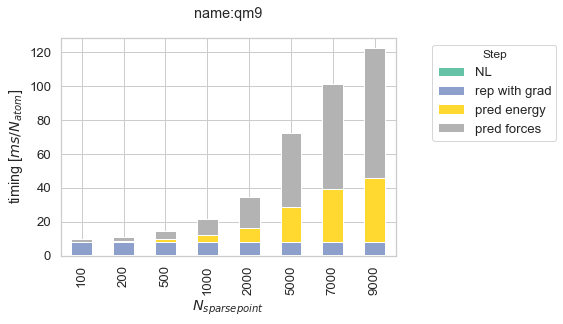

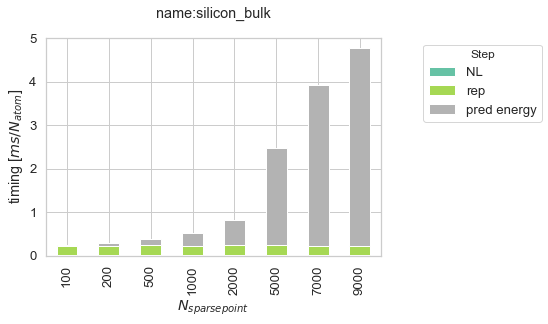

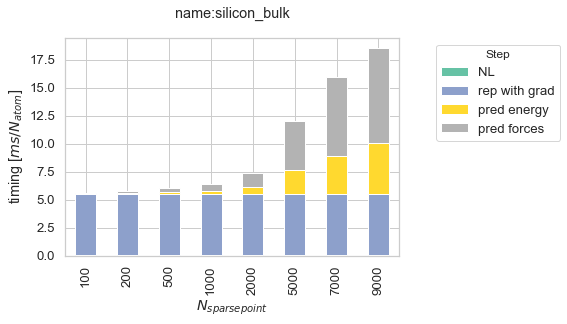

In [118]:
project = signac.get_project(fn_projects['m2'])
qry = {
    'representation.normalize':{'$eq':True},
    #'grads_timing':{'$eq':True},
       }
aa = []
order = {True:['NL', 'rep with grad', 'pred energy', 'pred forces'],
        False:['NL', 'rep', 'pred energy']}
# with same nb of feat as in QUIP
select = {'methane_sulfonic': 3696,
 'molecular_crystals': 6660,
 'silicon_bulk': 715,
 'methane_liquid': 952,
 'qm9': 18300}
for job in project.find_jobs(qry):
    if len(job.document) == 0: continue
    if select[job.sp.name] != job.sp.feature_subselection.Nselect:
        continue
    ee = job.document.benchmark
    for v in ee:
        v['$N_{sparse point}$'] = np.sum(list(job.sp.sparse_point_subselection.Nselect.values()))
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
        v['grads_timing'] = job.sp.grads_timing
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']
for (name,grads_timing), df_ in df.groupby(['name','grads_timing']):
    df2 = df_.pivot_table(index='$N_{sparse point}$', columns='tag', values='mean [ms/atom]')

    df2.reindex(columns=order[grads_timing]).plot(kind='bar', stacked=True, colormap="Set2")
    title = ' / '.join(['name:{}'.format(name)])
    plt.title(title,pad=20)
    plt.ylabel('timing [$ms/N_{atom}$]')
    plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.5, 1))
    # plt.yscale('log')
    fname = 'model-sample_sparsification-{}-n_feat_{}-{}.png'.format(name,select[name],grads_timing)
    plt.savefig(fpfx+fname, dpi=300, bbox_inches='tight')
    plt.show()

In [119]:
def n_feat(n,l,nsp):
    nn = n*nsp
    n_lin = nn*(nn+1)/2
    return int(l*n_lin)
print('methane_sulfonic',n_feat(8,6+1,4))
print('methane_liquid',n_feat(8,6+1,2))
print('molecular_crystals',n_feat(9,9+1,4))
print('silicon_bulk',n_feat(10,12+1,1))

methane_sulfonic 3696
methane_liquid 952
molecular_crystals 6660
silicon_bulk 715


In [120]:
aa= []
for job in project.find_jobs():
    if len(job.document) == 0: continue
    # print(job.sp.name, np.sum(list(job.sp.sparse_point_subselection.Nselect.values())))
    aa.append(np.sum(list(job.sp.sparse_point_subselection.Nselect.values())))
np.unique(aa)

array([ 100,  200,  500, 1000, 2000, 5000, 7000, 9000])

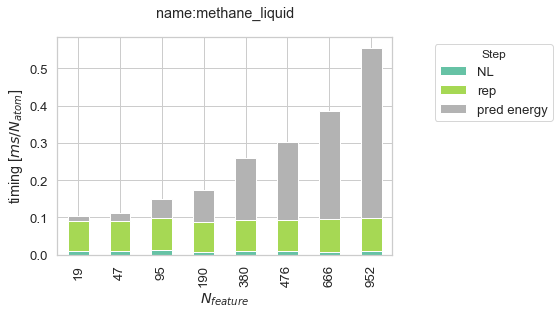

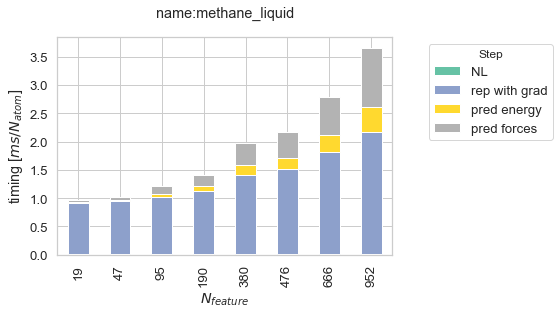

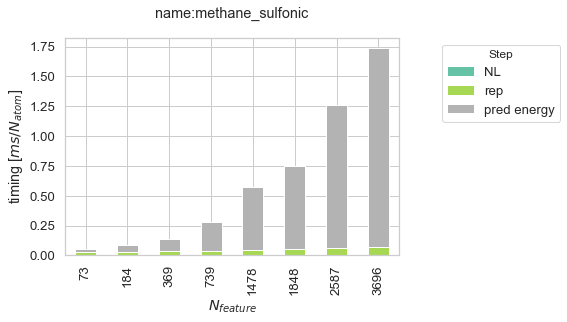

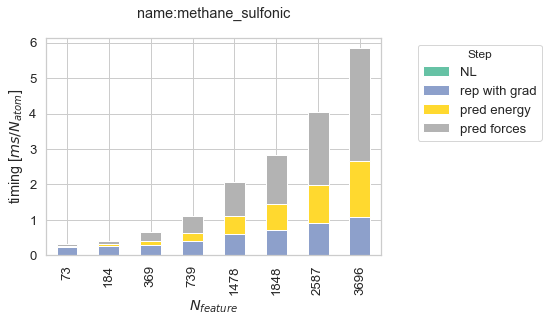

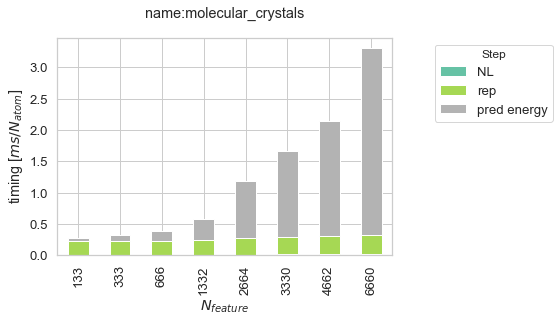

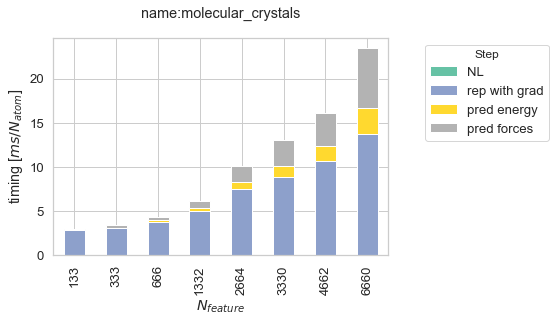

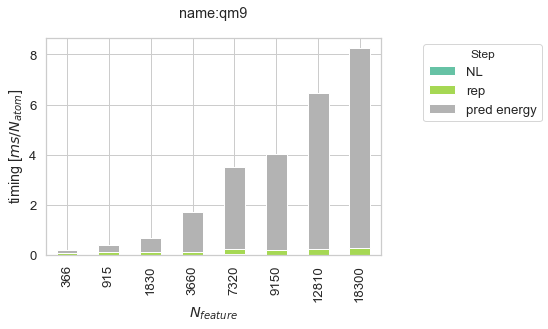

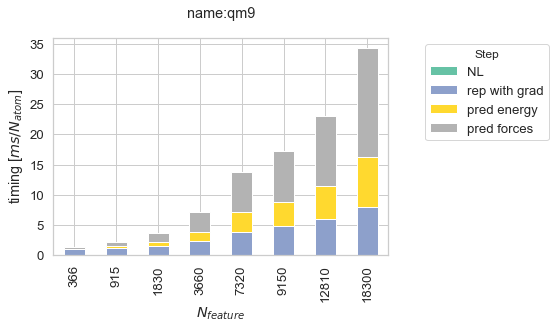

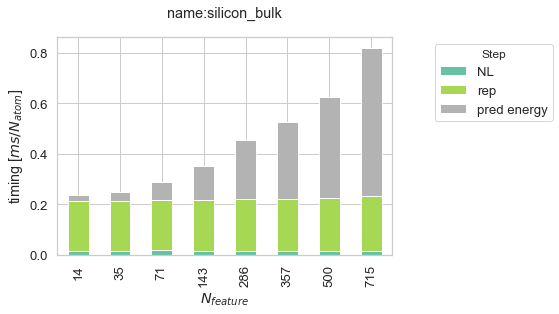

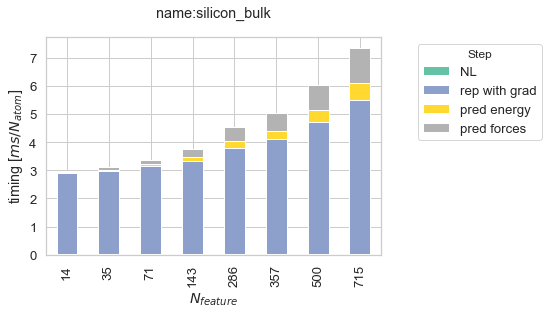

In [121]:
project = signac.get_project(fn_projects['m2'])
qry = {'representation.normalize':{'$eq':True}, 
       'feature_subselection.Nselect':{'$ne':None},
       #'grads_timing':{'$eq':True},
      }
aa = []
n_sparse = 2000
order = {True:['NL', 'rep with grad', 'pred energy', 'pred forces'],
        False:['NL', 'rep', 'pred energy']}

for job in project.find_jobs(qry):
    if len(job.document) == 0: continue
    if np.sum(list(job.sp.sparse_point_subselection.Nselect.values())) != n_sparse:
        continue
        
    # print(job.sp.feature_subselection)
    ee = job.document.benchmark
    for v in ee:
        v['$N_{feature}$'] = int(job.sp.feature_subselection.Nselect)
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
        v['grads_timing'] = job.sp.grads_timing
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']
for (name,grads_timing), df_ in df.groupby(['name','grads_timing']):
    df2 = df_.pivot_table(index='$N_{feature}$', columns='tag', values='mean [ms/atom]')

    df2.reindex(columns=order[grads_timing]).plot(kind='bar', stacked=True, colormap="Set2")
    title = ' / '.join([k+':'+str(df_.iloc[0][k]) for k in title_values])
    plt.title(title,pad=20)
    plt.ylabel('timing [$ms/N_{atom}$]')
    plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.5, 1))
    # plt.yscale('log')
    fname = 'model-feature_sparsification-{}-n_sparse_{}-{}.png'.format(name,n_sparse,grads_timing)
    plt.savefig(fpfx+fname, dpi=300, bbox_inches='tight')
    plt.show()

In [122]:
def plot_bar(df, title, x, y, yerr , row, col, **kwargs):
    g = sns.FacetGrid(df, col=col, row=row, height=5, **kwargs)
    g.map_dataframe(draw_bar, x, y, yerr, title)
    return g
def draw_bar(*args, **kwargs):
    data = kwargs.pop('data')
    data.plot(kind='bar', x=args[0], y=args[1], yerr=args[2],title=args[3], logy=True, ax=plt.gca())

In [123]:
project = signac.get_project(fn_projects['m2'])
qry = {
    'feature_subselection.Nselect':{'$ne':None},
       # 'grads_timing':{'$eq':True},
      }
aa = []

for job in project.find_jobs(qry):
    if len(job.document) == 0: continue
    ee = job.document.benchmark
    for v in ee:
        v['$N_{feature}$'] = int(job.sp.feature_subselection.Nselect)
        v['$N_{sparse point}$'] = np.sum(list(job.sp.sparse_point_subselection.Nselect.values()))
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
        # divide by 2 because yerr input is for the upper/lower error bar respectively
        v['std [ms/atom]'] = v['stdev'] / v['n_atoms'] * 1000 / 2
        v['grads_timing'] = job.sp.grads_timing
    aa.extend(ee)
df = pd.DataFrame(aa)
    

In [20]:
kwargs = dict(sharex=True, sharey=True, margin_titles=True)

for name,d in df.groupby('name'):
    print(name)
    plot_bar(d, x='tag', y='mean [ms/atom]', yerr='std [ms/atom]',title=name,
             col='$N_{sparse point}$',row='$N_{feature}$')
    plt.show()

methane_liquid


NameError: name 'plot_bar' is not defined

In [124]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm
def plot_contour(df, x, y, values , row, col, **kwargs):
    vmin=df[values].min()
    vmax=df[values].max()
    g = sns.FacetGrid(df, col=col, row=row, height=6, **kwargs)
    g.map_dataframe(draw_heatmap, x, y, values, cmap=cmap, square=True, cbar=False,
                    vmin=vmin, vmax=vmax)
    # g.map(sns.heatmap, x, y, values, cmap=cmap, square=True, cbar_kws={'label': values})
    # plt.legend(title=hue,loc='upper right', bbox_to_anchor=(1.25, 1))
    fig = g.fig
    fig.tight_layout(h_pad=1.5, w_pad=1.5)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.2, 0.05, 0.7])
    norm = Normalize(vmin=vmin, vmax=vmax)
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, label= values)
    return g
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    d = d.sort_index('index',ascending=False) 
    sns.heatmap(d, **kwargs)

methane_liquid pred energy


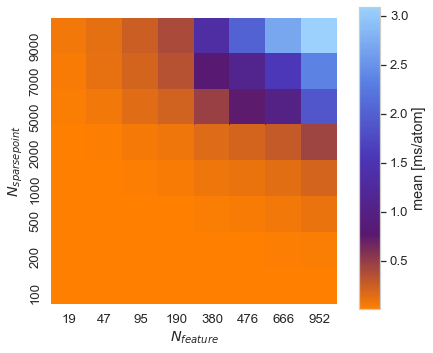

methane_liquid pred energy


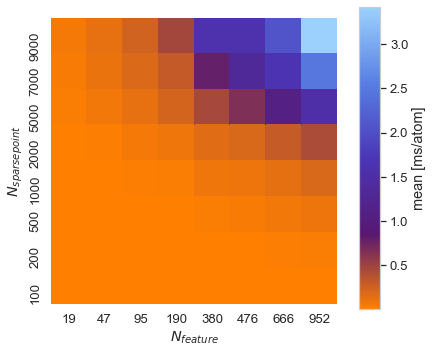

methane_liquid pred forces


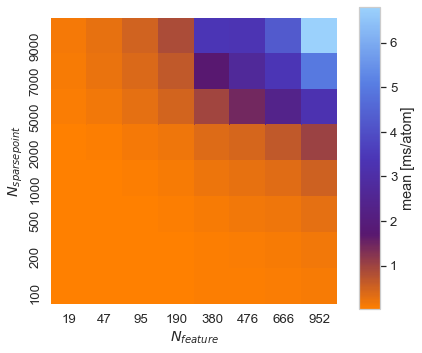

methane_liquid rep


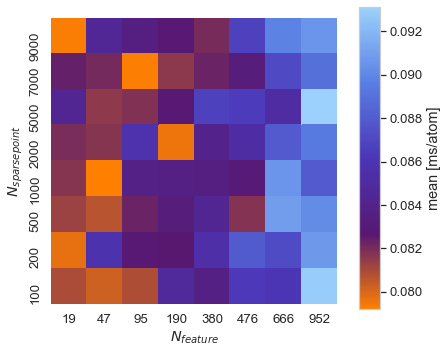

methane_liquid rep with grad


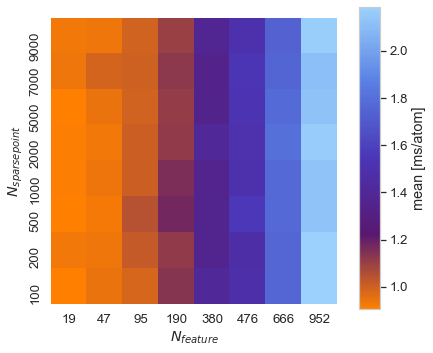

methane_sulfonic pred energy


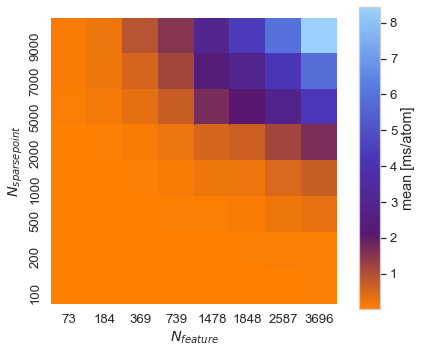

methane_sulfonic pred energy


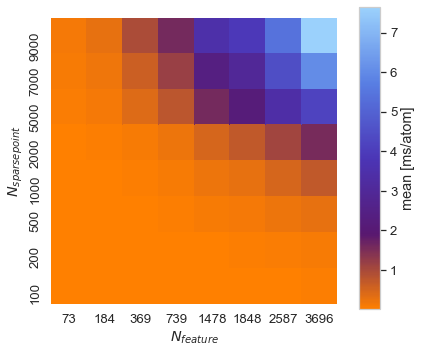

methane_sulfonic pred forces


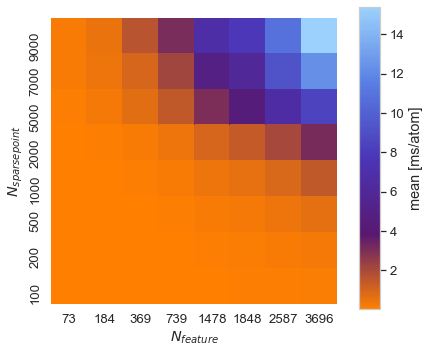

methane_sulfonic rep


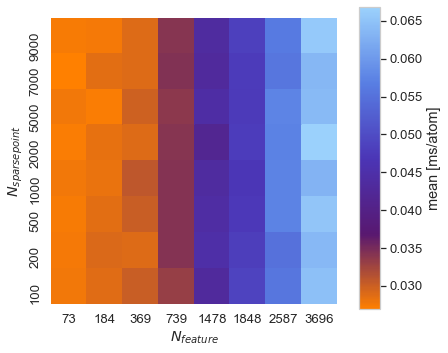

methane_sulfonic rep with grad


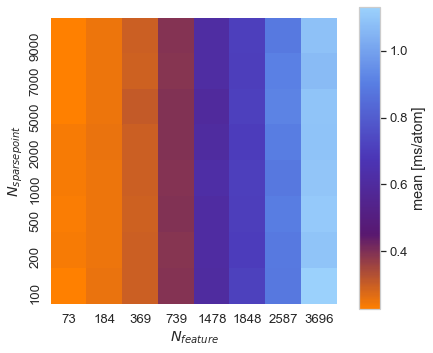

molecular_crystals pred energy


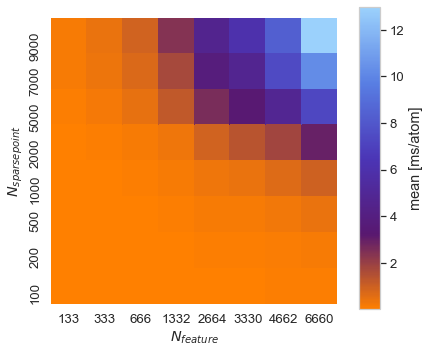

molecular_crystals pred energy


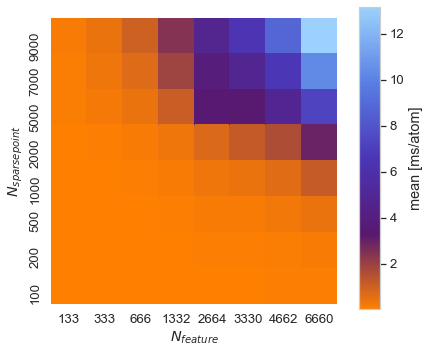

molecular_crystals pred forces


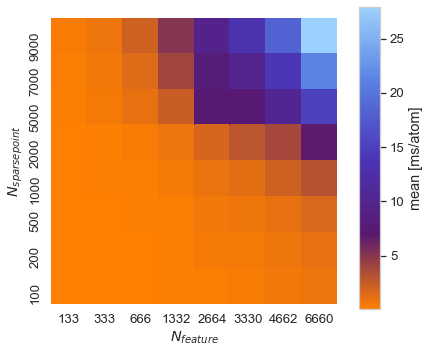

molecular_crystals rep


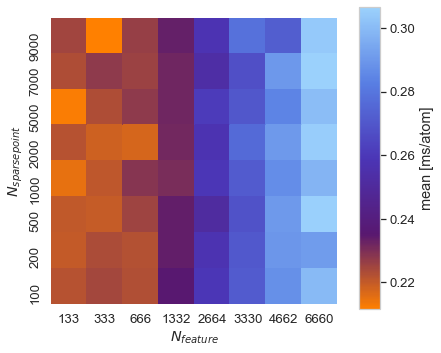

molecular_crystals rep with grad


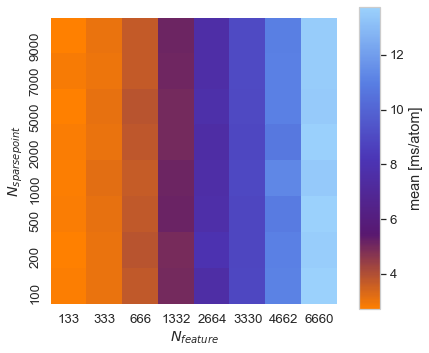

qm9 pred energy


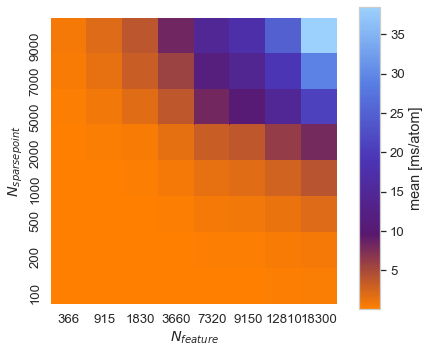

qm9 pred energy


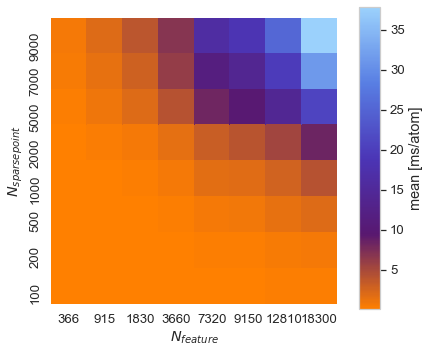

qm9 pred forces


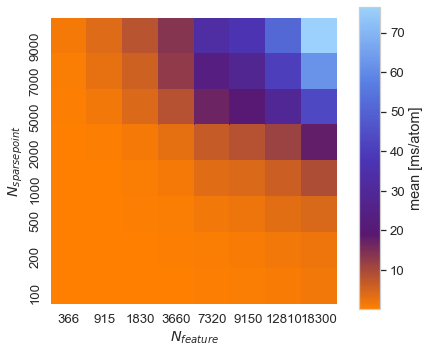

qm9 rep


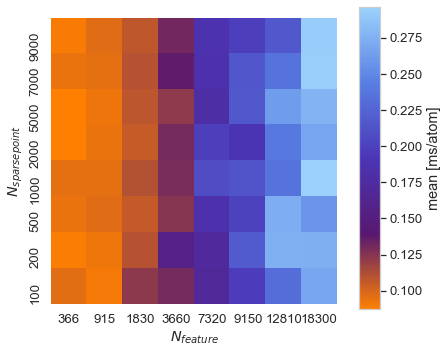

qm9 rep with grad


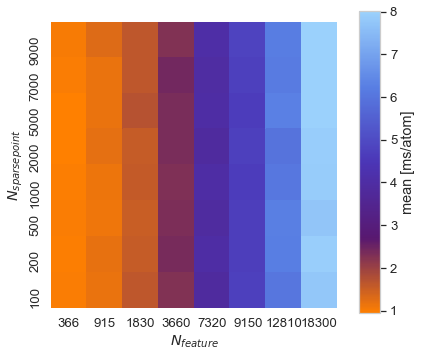

silicon_bulk pred energy


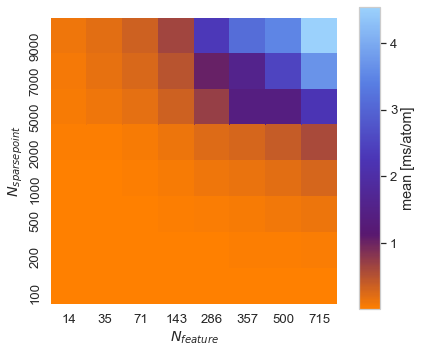

silicon_bulk pred energy


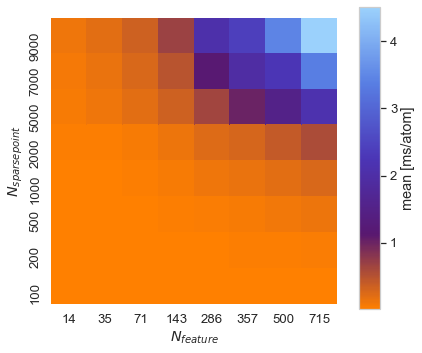

silicon_bulk pred forces


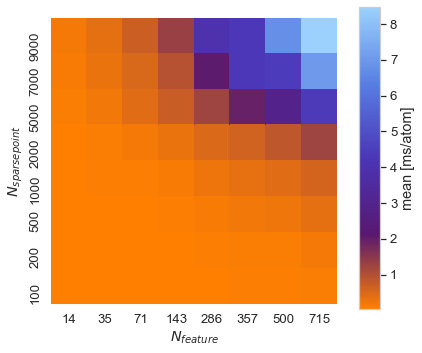

silicon_bulk rep


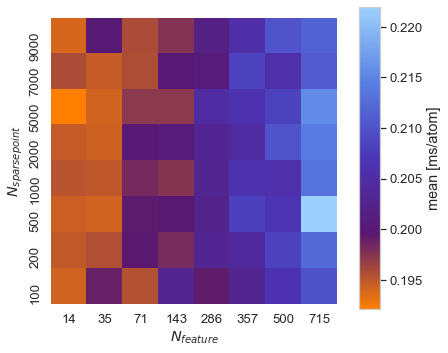

silicon_bulk rep with grad


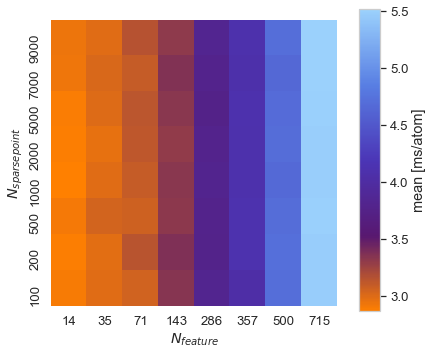

In [125]:
kwargs = dict(sharex=True, sharey=True, margin_titles=True)
for (name,tag,grads_timing),df_ in df.groupby(['name','tag','grads_timing']):
    if tag in ['NL']:
        continue
    print(name, tag)
    plot_contour(df_, x='$N_{feature}$', y='$N_{sparse point}$', values='mean [ms/atom]' , 
                 row=None, col=None, **kwargs)
    fname = 'model-feat_vs_sp-{}-{}-{}.png'.format(name,tag.replace(' ','_'),grads_timing)
    plt.savefig(fpfx+fname, dpi=300, bbox_inches='tight')
    plt.show()

methane_liquid pred forces


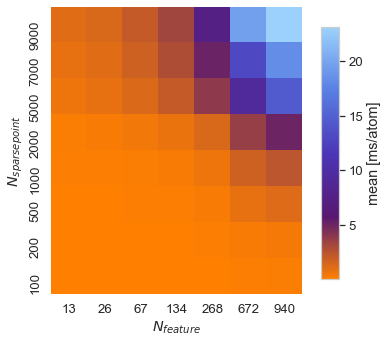

methane_sulfonic pred forces


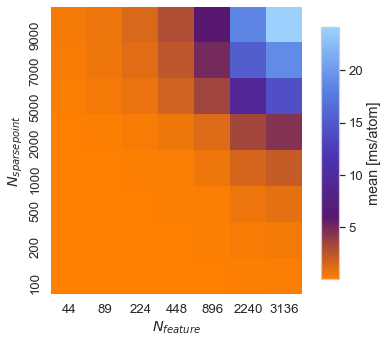

molecular_crystals pred forces


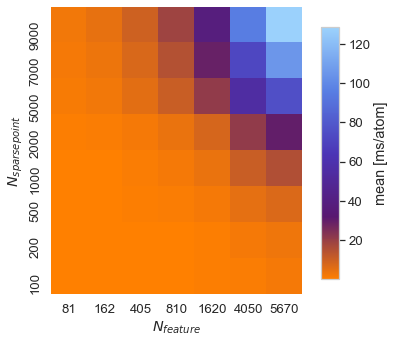

qm9 pred forces


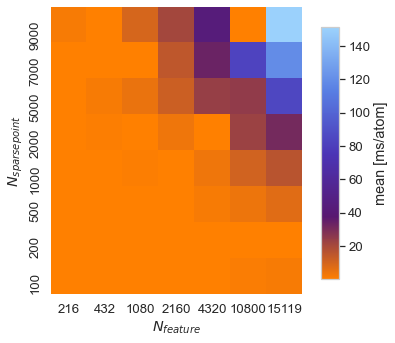

silicon_bulk pred forces


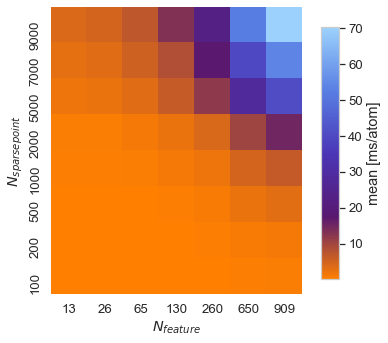

In [25]:
kwargs = dict(sharex=True, sharey=True, margin_titles=True)
for (name,tag),df_ in df.groupby(['name','tag']):
    if tag not in ['pred forces']:
        continue
    print(name, tag)
    plot_contour(df_, x='$N_{feature}$', y='$N_{sparse point}$', values='mean [ms/atom]' , 
                 row=None, col=None, **kwargs)
    plt.show()

methane_liquid


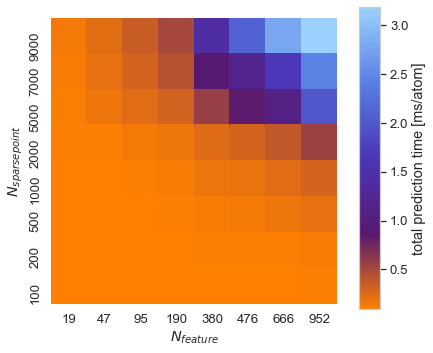

methane_liquid


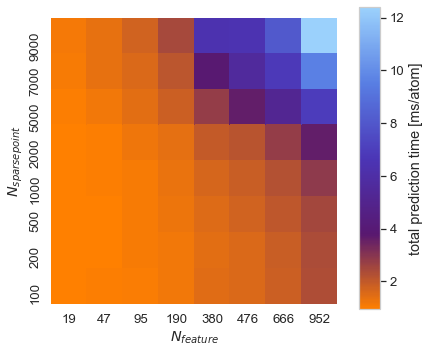

methane_sulfonic


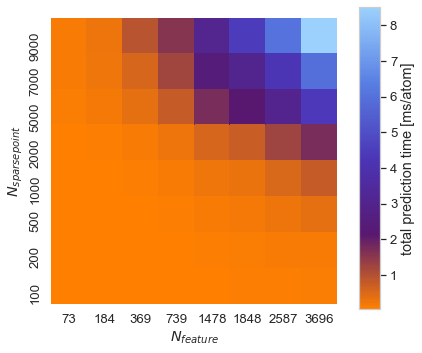

methane_sulfonic


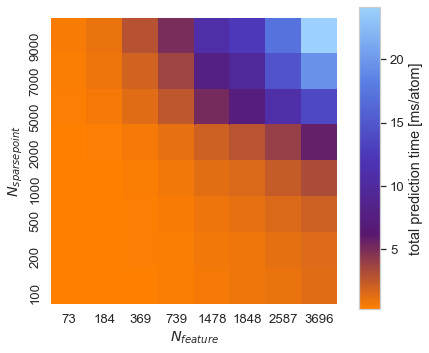

molecular_crystals


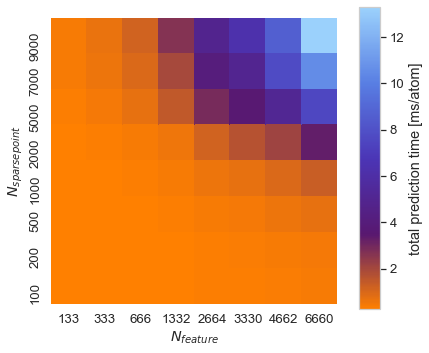

molecular_crystals


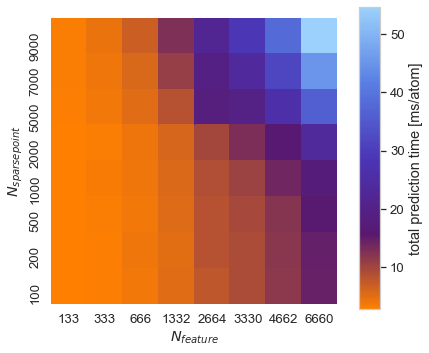

qm9


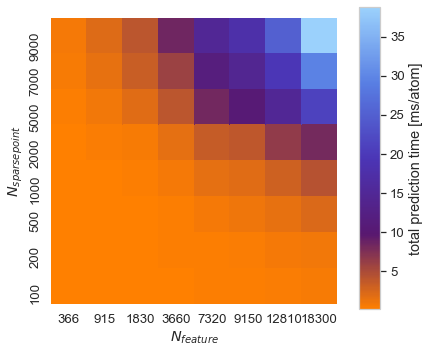

qm9


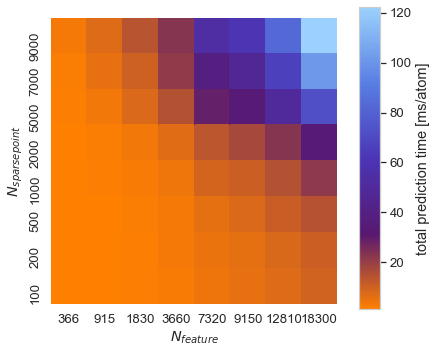

silicon_bulk


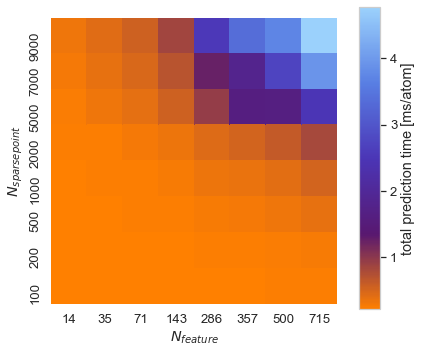

silicon_bulk


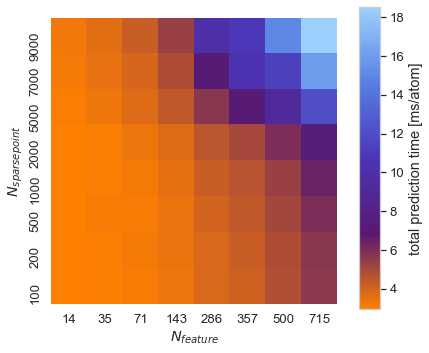

In [126]:
kwargs = dict(sharex=True, sharey=True, margin_titles=True)
dd = df.groupby(['name','grads_timing','$N_{feature}$','$N_{sparse point}$']).agg(
    total=('mean [ms/atom]', np.sum)
).reset_index()
dd=dd.rename(columns={'total':'total prediction time [ms/atom]'})
for (name,grads_timing), df_ in dd.groupby(['name','grads_timing']):
    print(name)
    plot_contour(df_, x='$N_{feature}$', y='$N_{sparse point}$', values='total prediction time [ms/atom]' , 
                 row=None, col=None, **kwargs)
    fname = 'model-feat_vs_sp-{}-{}-total.png'.format(name,grads_timing)
    plt.savefig(fpfx+fname, dpi=300, bbox_inches='tight')
    plt.show()

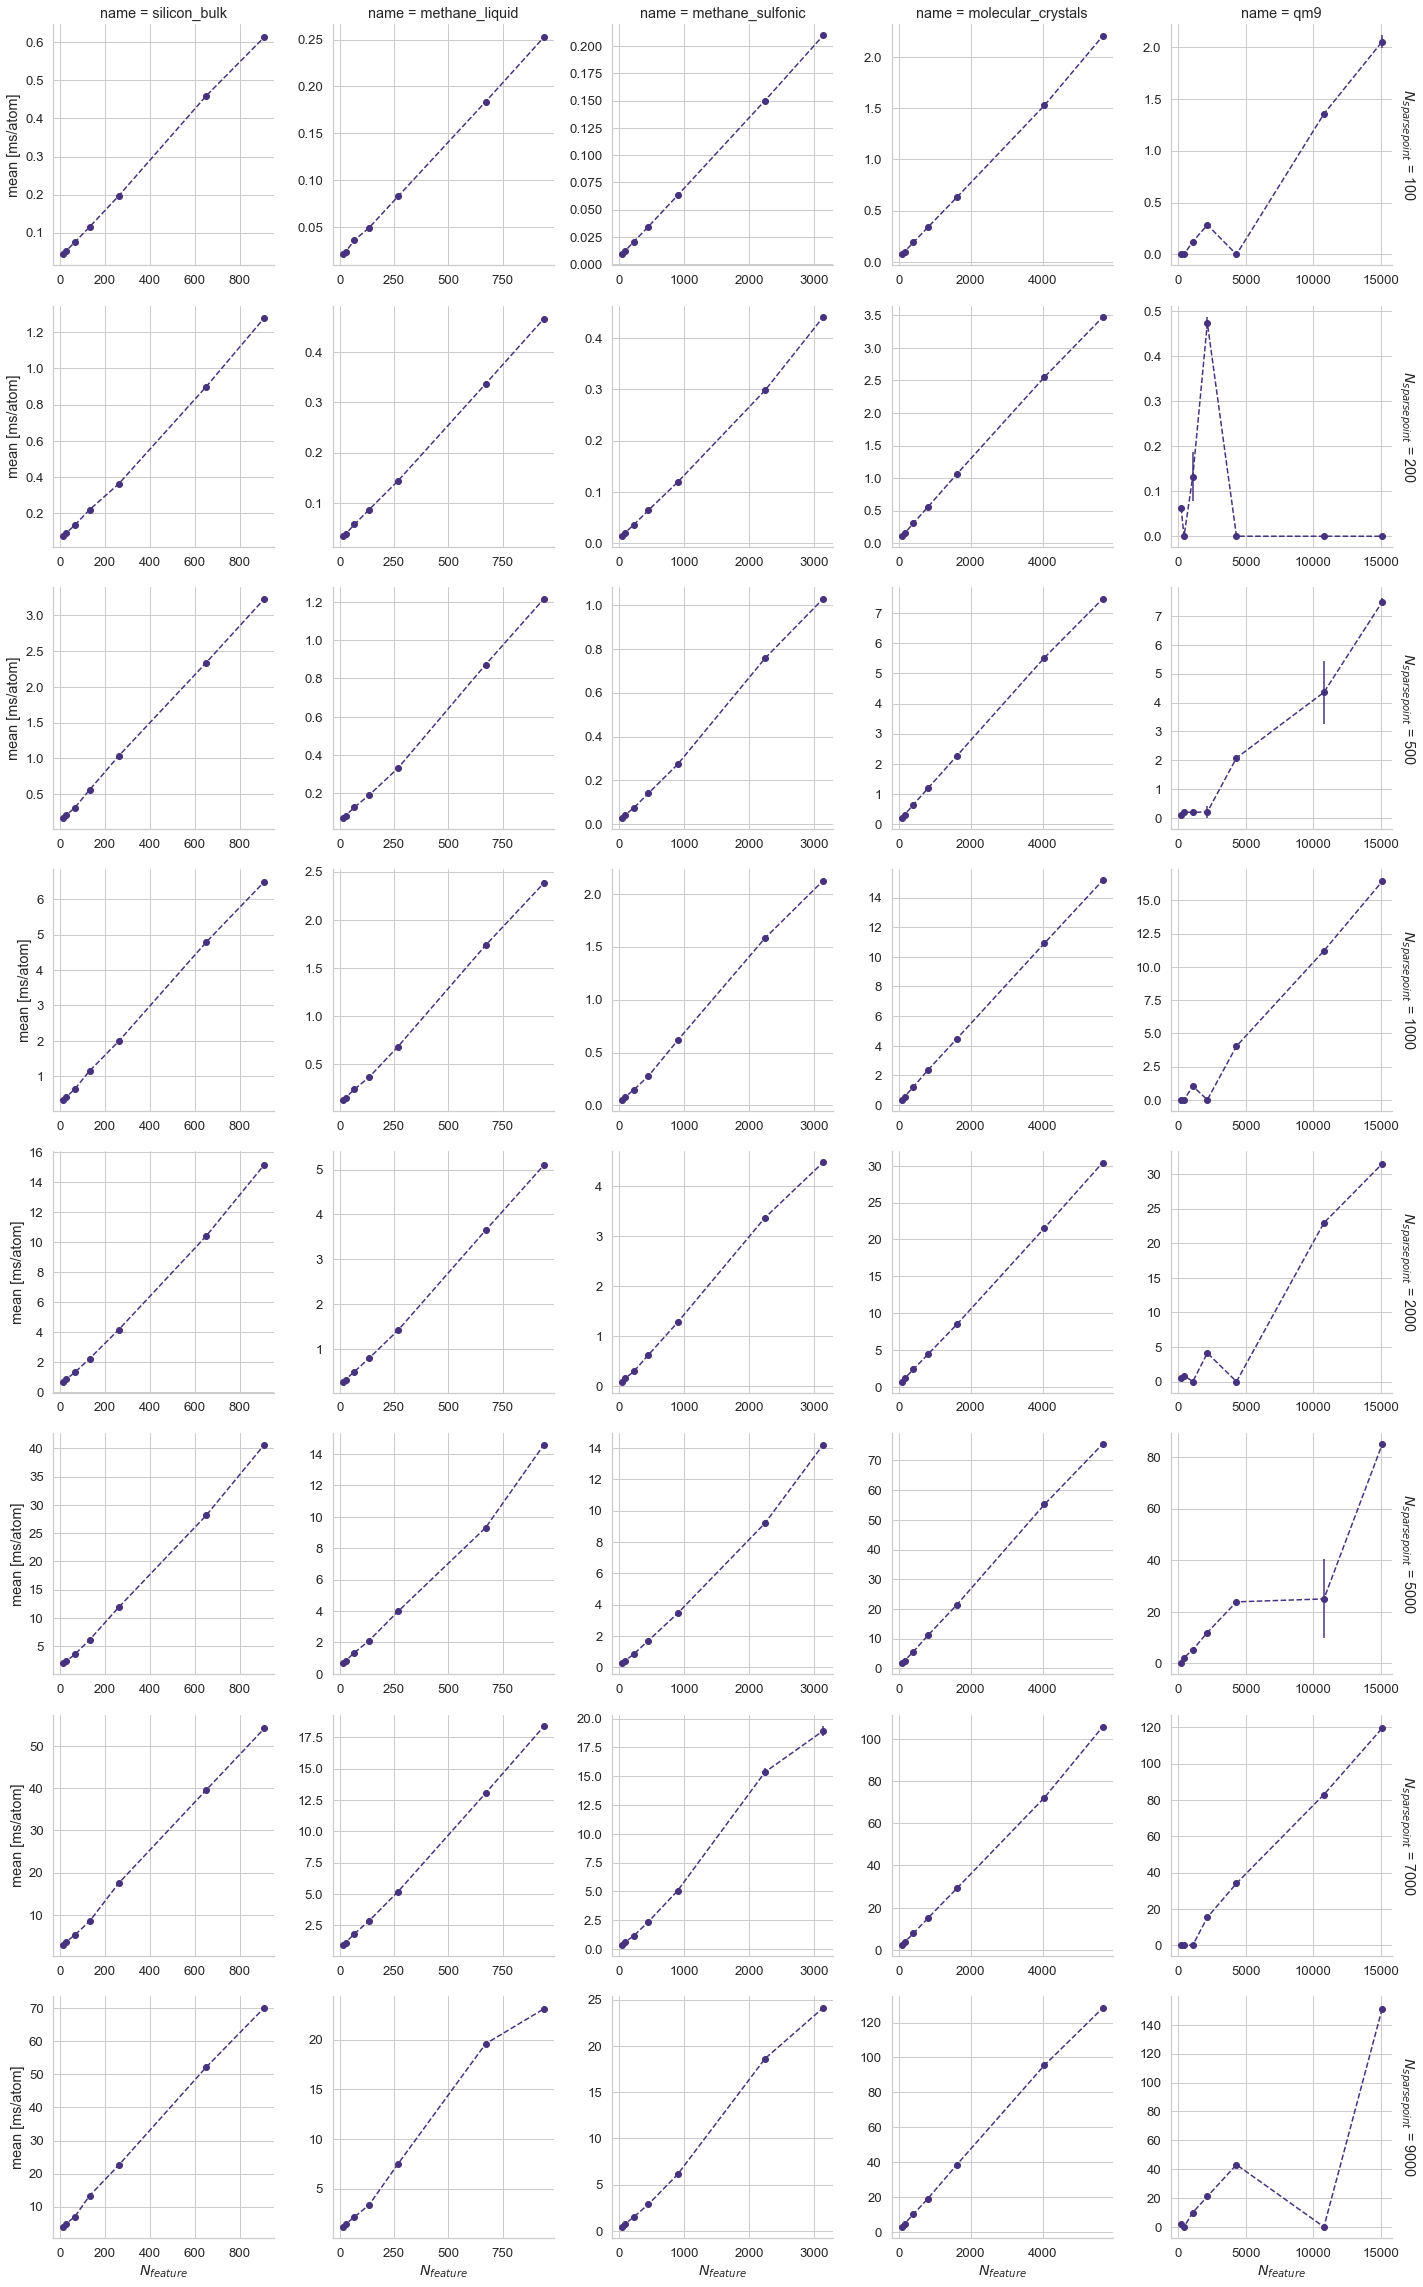

In [27]:
def plot_error(df, x, y, err , row, col, hue, **kwargs):
    g = sns.FacetGrid(df, col=col, row=row, hue=hue, height=4, **kwargs)
    g.map(plt.errorbar, x, y, err, marker="o", linestyle='--')
    # plt.legend(title=hue,loc='upper right', bbox_to_anchor=(1.35, 1))
    # for ax in g.axes.flatten():
    #     ax.set_xscale('log')
    #     ax.set_yscale('log')
    return g
kwargs = dict(sharex=False, sharey=False, margin_titles=True)

aa = df[df['tag'] == 'pred forces'].sort_values('$N_{feature}$')
plot_error(aa, '$N_{feature}$', 'mean [ms/atom]', 'std [ms/atom]', 
            '$N_{sparse point}$', 'name', None, **kwargs)

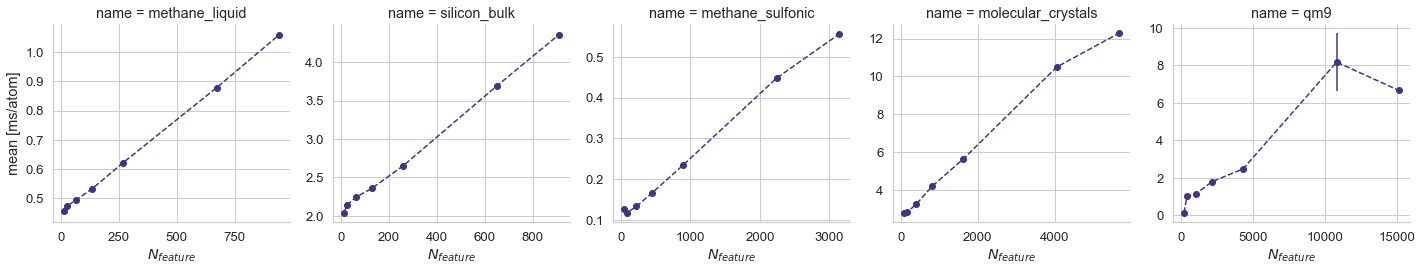

In [28]:
aa = df[df['tag'] == 'rep with grad'].query('`$N_{sparse point}$` == 5000').sort_values('$N_{feature}$')
plot_error(aa, '$N_{feature}$', 'mean [ms/atom]', 'std [ms/atom]', 
            None, 'name', None, **kwargs)

# new prediction impl

In [82]:
sys.path.insert(0, './scripts')
from path import STRUCTURE_PATH, RASCAL_BUILD_PATH, BUILD_PATH
from utils.io import tojson, fromjson, fromfile, _decode
from utils import Timer
sys.path.insert(0, './build/_deps/rascal-build/')
from rascal.representations import SphericalInvariants, SphericalExpansion
from rascal.representations.spherical_invariants import get_power_spectrum_index_mapping
from rascal.representations import SphericalInvariants
from rascal.models import Kernel, train_gap_model, SparsePoints, KRR
from rascal.models.krr import compute_forces
from rascal.neighbourlist import AtomsList
from rascal.utils import from_dict, CURFilter, fps, to_dict
from rascal.utils.io import dump_obj,load_obj
from ase.build import make_supercell
from tqdm import tqdm

In [42]:
project = signac.get_project(fn_projects['m2'])
qry = {'feature_subselection.Nselect':{'$eq':None}, 
       'representation.normalize':{'$eq':True},
       'name':'molecular_crystals',
       'grads_timing':{'$eq':True},
      }
aa = []
order = {True:['NL', 'rep with grad', 'pred energy', 'pred forces'],
        False:['NL', 'rep', 'pred energy']}

for job in project.find_jobs(qry):
    if len(job.document) == 0: continue

    sp = _decode(job.statepoint())
    st,lg = job.sp.start_structure, job.sp.n_structures
    frames = fromfile('./structures/molecular_crystals_100.json')[st:st+lg]

    model = load_obj('./results/model/model.json')
    soap = model.get_representation_calculator()
    grads_timing = job.sp.grads_timing

    hypers = soap._get_init_params()
    hypers['compute_gradients'] = grads_timing
    soap = SphericalInvariants(**hypers)

    frames = [make_supercell(frames[0], 3*np.eye(3), wrap=True, tol=1e-11)]

    managers = soap.transform(frames)
    break

FileNotFoundError: [Errno 2] No such file or directory: '/local/git/rascal_benchmarks/results/model_5/workspace/8a27ae5f634702d5f872aa397a9314b5/model.json'

In [83]:


model = load_obj('./results/model/model.json')
soap = model.get_representation_calculator()

hypers = soap._get_init_params()
hypers['compute_gradients'] = True
soap = SphericalInvariants(**hypers)


In [85]:
# frames = fromfile('./structures/molecular_crystals_100.json')[0:10]
frames = fromfile('./structures/methane_sulfonic_150.json')[0:10]
frames = [make_supercell(frames[0], np.diag([1,2,2]), wrap=True, tol=1e-11)]
kernel = Kernel(soap, name='GAP', zeta=2, target_type='Structure', kernel_type='Sparse')
n_atoms = len(frames[0])
n_atoms

1092

In [86]:
managers = soap.transform(frames)

In [95]:
%%timeit 
forces = compute_forces(soap._representation, model.kernel._kernel, managers.managers, model.X_train._sparse_points, model.weights.reshape((1, -1)))

7.96 s ± 242 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [96]:
%%timeit
KNM = kernel(managers, model.X_train, (True, False))
forces_ref = np.dot(KNM, model.weights).reshape((-1,3))

37.6 s ± 1.01 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [97]:
forces = compute_forces(soap._representation, model.kernel._kernel, managers.managers, model.X_train._sparse_points, model.weights.reshape((1, -1)))
KNM = kernel(managers, model.X_train, (True, False))
forces_ref = np.dot(KNM, model.weights).reshape((-1,3))


False

In [98]:
np.allclose(forces, -forces_ref)

True

In [32]:
timer = Timer(tag='', logger=None)
for ii in range(3):
    with timer:
        rep = model.kernel._representation
        forces = compute_forces(rep, model.kernel._kernel, managers.managers, 
                                model.X_train._sparse_points, model.weights.reshape((-1, 1)))

data = timer.dumps()
data

{'tag': '',
 'mean': 0.00011184331960976124,
 'stdev': 2.7462760002999992e-05,
 'min': 9.041791781783104e-05,
 'max': 0.0001888158731162548,
 'samples': [0.0001888158731162548,
  0.00010013696737587452,
  0.00010422291234135628,
  9.041791781783104e-05,
  0.00011738506145775318,
  0.00012167287059128284,
  0.00010734586976468563,
  9.27348155528307e-05,
  9.24279447644949e-05,
  0.00010327296331524849]}

In [33]:
timer = Timer(tag='', logger=None)
for ii in range(3):
    with timer:        
        KNM = kernel(managers, model.X_train, (True, False))
        forces_ref = np.dot(KNM, model.weights).reshape((-1,3))
timer.dumps()

{'tag': '',
 'mean': 0.13500071929302065,
 'stdev': 0.0114882905581593,
 'min': 0.10430319095030427,
 'max': 0.15316696208901703,
 'samples': [0.10430319095030427,
  0.15316696208901703,
  0.13165837107226253,
  0.13732138089835644,
  0.13743104017339647,
  0.13764296798035502,
  0.13706226693466306,
  0.13727911608293653,
  0.13707831990905106,
  0.13706357683986425]}

In [41]:
rep = model.kernel._representation
forces = compute_forces(soap._representation, model.kernel._kernel, 
                        managers.managers, model.X_train._sparse_points, model.weights.reshape((1, -1)))
KNM = kernel(managers, model.X_train, (True, False))
forces_ref = -np.dot(KNM, model.weights).reshape((-1,3))
np.allclose(forces,forces_ref)

True

In [38]:
soap.hypers

{'max_radial': 9,
 'max_angular': 9,
 'soap_type': 'PowerSpectrum',
 'normalize': True,
 'inversion_symmetry': True,
 'expansion_by_species_method': 'structure wise',
 'global_species': [1, 6, 7, 8],
 'compute_gradients': True,
 'cutoff_function': {'type': 'ShiftedCosine',
  'cutoff': {'value': 5.0, 'unit': 'AA'},
  'smooth_width': {'value': 1.0, 'unit': 'AA'}},
 'gaussian_density': {'type': 'Constant',
  'gaussian_sigma': {'value': 0.4, 'unit': 'AA'}},
 'radial_contribution': {'type': 'GTO',
  'optimization': {'type': 'Spline',
   'accuracy': 1e-08,
   'range': {'begin': 0, 'end': 5}}}}

In [42]:
forces,forces_ref

(array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[-0., -0., -0.],
        [-0., -0., -0.],
        [-0., -0., -0.],
        ...,
        [-0., -0., -0.],
        [-0., -0., -0.],
        [-0., -0., -0.]]))

# New heading

In [8]:
sys.path.insert(0, './scripts')
from path import STRUCTURE_PATH, RASCAL_BUILD_PATH, BUILD_PATH
from utils.io import tojson, fromjson, fromfile, _decode
from utils import Timer
sys.path.insert(0, './build/_deps/rascal-build/')
from rascal.representations import SphericalInvariants, SphericalExpansion
from rascal.representations.spherical_invariants import get_power_spectrum_index_mapping
from rascal.representations import SphericalInvariants
from rascal.models import Kernel, train_gap_model, SparsePoints, KRR
from rascal.models.krr import compute_forces
from rascal.neighbourlist import AtomsList
from rascal.utils import from_dict, CURFilter, fps, to_dict
from rascal.utils.io import dump_obj,load_obj
from ase.build import make_supercell
from tqdm import tqdm

In [11]:
names = ['silicon_bulk', 'methane_liquid', 'methane_sulfonic', 'molecular_crystals', 'qm9']
fns = {
    'silicon_bulk': 'silicon_bulk.json',
    'methane_liquid': 'methane_liquid.json',
    'molecular_crystals': 'molecular_crystals_100.json',
    'qm9': 'qm9.json',
    'methane_sulfonic': 'methane_sulfonic_150.json',
}
n_sparse = [100, 200, 500, 1000, 2000, 5000, 7000, 9000]
misc_entries = {
    'silicon_bulk' : {
        "N_ITERATIONS" : 5,
        'start_structure': 600,
        "n_structures" : 120,
        "n_replication" : 3,
    },
    'methane_liquid' : {
        "N_ITERATIONS" : 5,
        'start_structure': 100,
        "n_structures" : 100,
        "n_replication" : 3,
    },
    'methane_sulfonic' : {
        "N_ITERATIONS" : 5,
        'start_structure': 0,
        "n_structures" : 50,
        "n_replication" : 3,
    },
    'molecular_crystals' : {
        "N_ITERATIONS" : 5,
        'start_structure': 0,
        "n_structures" : 90,
        "n_replication" : 2,
    },
    'qm9' : {
        "N_ITERATIONS" : 5,
        'start_structure': 0,
        "n_structures" : 800,
        "n_replication" : 1,
    }
}

In [57]:
sparse_proportions = {}
for name in names:
    st,lg = misc_entries[name]['start_structure'],misc_entries[name]['n_structures']
    frames = fromfile('./structures/'+fns[name])[st:st+lg]
    numbers = []
    for frame in frames:
        numbers.extend(frame.get_atomic_numbers())
    global_species = np.unique(numbers)
    n_atoms = np.bincount(numbers)
    n_atom = np.sum(n_atoms)
    print(name,n_atoms,n_atom)
    sparse_proportions[name] = {sp:n_atoms[sp]/n_atom for sp in global_species}
    
# sparse_proportions

silicon_bulk [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0 10186] 10186
methane_liquid [    0 10800     0     0     0     0  2700] 13500
methane_sulfonic [   0 6502    0    0    0    0 6050    0 1419    0    0    0    0    0
    0    0   50] 14021
molecular_crystals [   0 6059    0    0    0    0 5464  575  971] 13069
qm9 [   0 7384    0    0    0    0 5054  802 1146   32] 14418


In [69]:
def get_per_sp_sparsepoints(n_sparse, sparse_proportions):
    aa = np.zeros(np.max(list(sparse_proportions))+1,dtype=int)
    for sp,f in sparse_proportions.items():
        val = int(n_sparse*f)
        if val == 0:
            val = 1
        aa[sp] = val

    v = np.sum(aa)
    if v != n_sparse:
        diff = n_sparse-v
        bb = aa.copy()
        iaa = np.argmax(bb)
        aa[iaa] = aa[iaa]+diff
        
    Nselect = {sp:aa[sp] for sp,f in sparse_proportions.items()}
    return Nselect

In [70]:
for name in names:
    aa = get_per_sp_sparsepoints(100, sparse_proportions[name])
    print(aa)
    aa = [np.sum(list(get_per_sp_sparsepoints(v, sparse_proportions[name]).values())) for v in n_sparse]
    print(name,aa)

{14: 100}
silicon_bulk [100, 200, 500, 1000, 2000, 5000, 7000, 9000]
{1: 80, 6: 20}
methane_liquid [100, 200, 500, 1000, 2000, 5000, 7000, 9000]
{1: 46, 6: 43, 8: 10, 16: 1}
methane_sulfonic [100, 200, 500, 1000, 2000, 5000, 7000, 9000]
{1: 48, 6: 41, 7: 4, 8: 7}
molecular_crystals [100, 200, 500, 1000, 2000, 5000, 7000, 9000]
{1: 52, 6: 35, 7: 5, 8: 7, 9: 1}
qm9 [100, 200, 500, 1000, 2000, 5000, 7000, 9000]


In [17]:
print(sparse_proportions)

{'silicon_bulk': {14: 1.0}, 'methane_liquid': {1: 0.8, 6: 0.2}, 'methane_sulfonic': {1: 0.4637329719706155, 6: 0.43149561372227374, 8: 0.10120533485486057, 16: 0.0035660794522501963}, 'molecular_crystals': {1: 0.46361619098630347, 6: 0.41808860662636776, 7: 0.043997245389853855, 8: 0.07429795699747493}, 'qm9': {1: 0.5121376057705646, 6: 0.35053405465390486, 7: 0.05562491330281592, 8: 0.07948397836038286, 9: 0.0022194479123318076}}
